# 1. Loading Packages & Data

## 1.1 Loading Packages

In [1]:
import pandas as pd
import numpy as np

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## 1.2 Loading Data 

In [2]:
df = pd.read_excel(r"D:\Daniel\test\sms\CreditRiskDataset.xlsx")
df.shape

(32581, 12)

In [3]:
df.head().T

,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
loan_grade,D,B,C,C,C
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1
loan_percent_income,0.59,0.1,0.57,0.53,0.55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df['loan_status'] = df['loan_status'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32581 non-null  int64   
 1   person_income               32581 non-null  int64   
 2   person_home_ownership       32581 non-null  object  
 3   person_emp_length           31686 non-null  float64 
 4   loan_intent                 32581 non-null  object  
 5   loan_grade                  32581 non-null  object  
 6   loan_amnt                   32581 non-null  int64   
 7   loan_int_rate               29465 non-null  float64 
 8   loan_status                 32581 non-null  category
 9   loan_percent_income         32581 non-null  float64 
 10  cb_person_default_on_file   32581 non-null  object  
 11  cb_person_cred_hist_length  32581 non-null  int64   
dtypes: category(1), float64(3), int64(4), object(4)
memory usage: 2.8+ MB


# 2. Exploratory Data Analysis

In [6]:
for column in df.columns:
    print(f" There is {df[column].nunique()}, unique values in column '{column}'.")

 There is 58, unique values in column 'person_age'.
 There is 4295, unique values in column 'person_income'.
 There is 4, unique values in column 'person_home_ownership'.
 There is 36, unique values in column 'person_emp_length'.
 There is 6, unique values in column 'loan_intent'.
 There is 7, unique values in column 'loan_grade'.
 There is 753, unique values in column 'loan_amnt'.
 There is 348, unique values in column 'loan_int_rate'.
 There is 2, unique values in column 'loan_status'.
 There is 77, unique values in column 'loan_percent_income'.
 There is 2, unique values in column 'cb_person_default_on_file'.
 There is 29, unique values in column 'cb_person_cred_hist_length'.


In [7]:
df.duplicated().sum()

165

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

- There are 165 duplicated records in the data. It needs to be deleted so the analysis can be more accurate.

In [9]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

The percentage value of response variable: loan_status
0    0.781312
1    0.218688
Name: proportion, dtype: float64


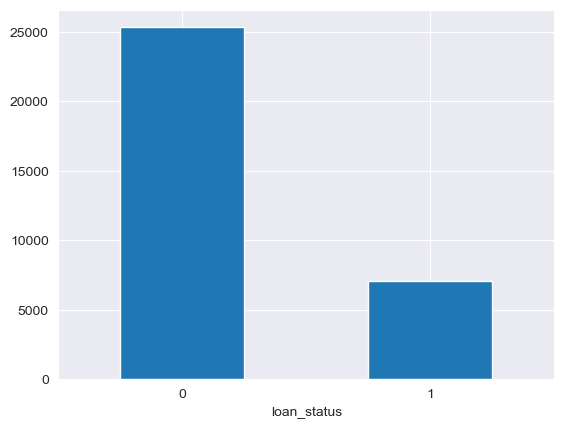

In [10]:
df.loan_status.value_counts().plot(kind='bar',
                                   rot=0)

print("The percentage value of response variable:", df.loan_status.value_counts(normalize=True))


- The status loan in 'fail' or `0` imbalance compared to 'success' or `1` one. The amount in 'fail' is 3 times much more than 'success' records.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.00,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,31529.0,4.790510,4.145490,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,29321.0,11.017265,3.241680,5.42,7.90,10.99,13.47,23.22
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.00,8.00,30.00


## 2.1 Numerical Data Visualisation

In [12]:
# Defining a function for plotting the distribution of the data
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax = axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' is right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' is left skewed".format(col))

### 2.1.1 Predictor `person_age`

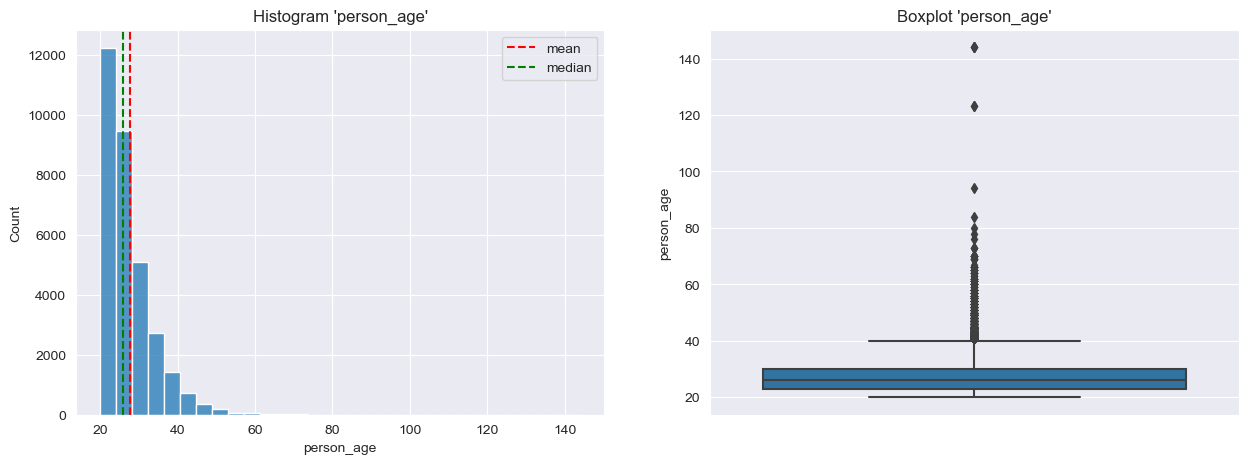

person_age Kurtosis: 18.56023083723881
person_age Skewness: 2.5804901303480556
Columns 'person_age' is right skewed


In [13]:
plot_dist(df, 'person_age')

In [14]:
print(f"There are {len(df[df['person_age'] > 80])} records that person more than 80 years")
df[df['person_age'] > 80]

There are 7 records that person more than 80 years


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,N,27
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24


In [15]:
# Descriptive of person_age by response loan_status
df['person_emp_length'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,24721.0,4.970673,4.132464,0.0,2.0,4.0,7.0,123.0
1,6808.0,4.136310,4.127139,0.0,1.0,3.0,6.0,123.0


### 2.1.2 Predictor `person_income`

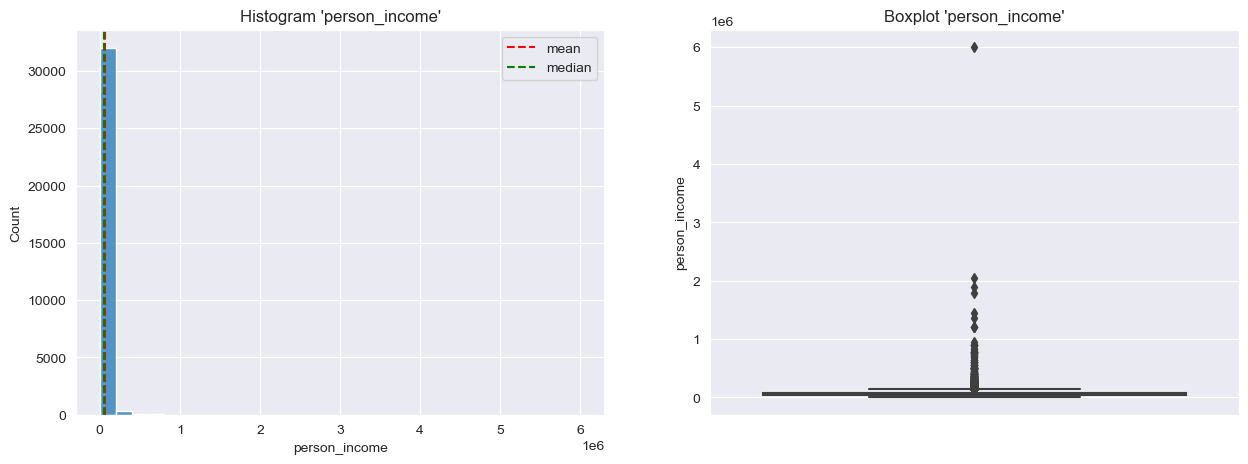

person_income Kurtosis: 2701.116240655086
person_income Skewness: 32.95874828815014
Columns 'person_income' is right skewed


In [16]:
plot_dist(df, 'person_income')

In [17]:
print(f"There are {len(df[df['person_income'] > 1000000])} records that person have income more than 1 million USD.")

df[df['person_income'] > 1000000]

There are 9 records that person have income more than 1 million USD.


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17833,32,1200000,MORTGAGE,1.0,VENTURE,A,12000,7.51,0,0.01,N,8
29119,36,1200000,OWN,16.0,MEDICAL,A,10000,6.54,0,0.01,N,11
29120,40,1200000,MORTGAGE,1.0,MEDICAL,A,10000,NaN,0,0.01,N,16
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0,0.00,Y,15
31922,47,1362000,MORTGAGE,9.0,VENTURE,A,6600,7.74,0,0.00,N,17
31924,44,1440000,MORTGAGE,7.0,DEBTCONSOLIDATION,A,6400,7.40,0,0.00,N,15
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
32497,63,1782000,RENT,13.0,EDUCATION,C,12025,14.27,0,0.01,N,30
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,NaN,0,0.00,N,21


In [18]:
# Descriptive of person_income by response loan_status
df['person_income'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,25327.0,70849.122794,66703.088937,7000.0,42000.0,60000.0,84191.0,6000000.0
1,7089.0,49094.497955,36342.352071,4000.0,30000.0,41682.0,59600.0,703800.0


### 2.1.3 Predictor `person_emp_length`

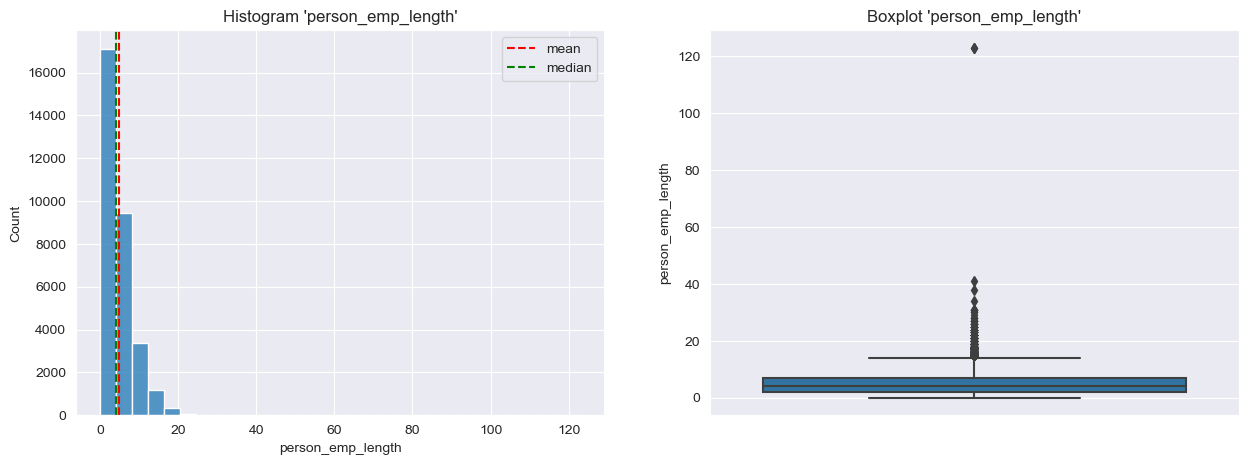

person_emp_length Kurtosis: 43.81608173924572
person_emp_length Skewness: 2.619915431174932
Columns 'person_emp_length' is right skewed


In [19]:
plot_dist(df, 'person_emp_length')

In [20]:
print(f"There are {len(df[df['person_emp_length'] > 45])} records that person have worked more than 45 years.")

df[df['person_emp_length'] > 45]

There are 2 records that person have worked more than 45 years.


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [21]:
# Descriptive of person_emp_length by response loan_status
df['person_emp_length'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,24721.0,4.970673,4.132464,0.0,2.0,4.0,7.0,123.0
1,6808.0,4.136310,4.127139,0.0,1.0,3.0,6.0,123.0


### 2.1.4 Predictor `loan_int_rate`

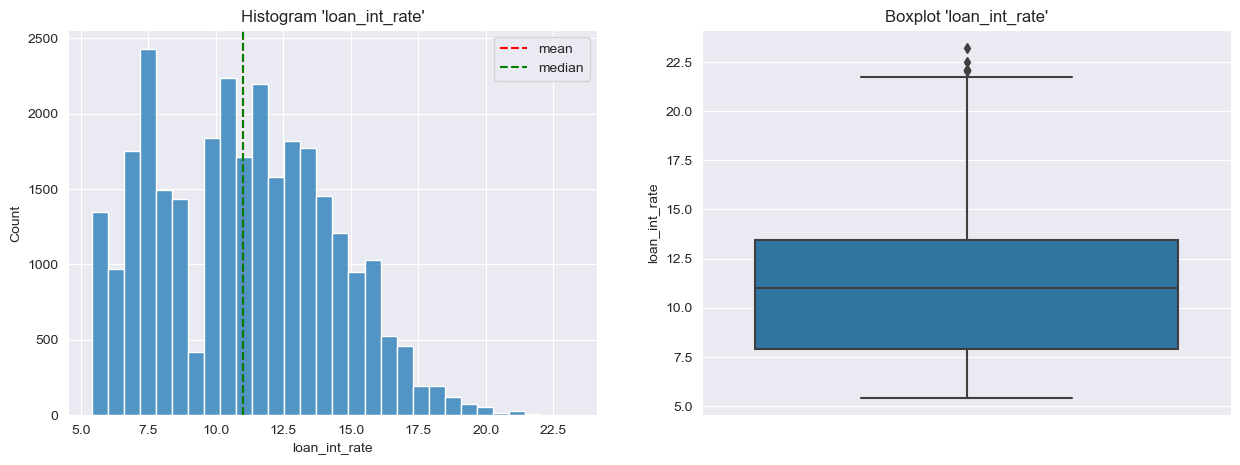

loan_int_rate Kurtosis: -0.67307554031354
loan_int_rate Skewness: 0.2070016541005385
Columns 'loan_int_rate' is normal distribution


In [22]:
plot_dist(df, 'loan_int_rate')

In [23]:
# Descriptive of loan_int_rate by response loan_status
df['loan_int_rate'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,22873.0,10.439218,2.983112,5.42,7.68,10.59,12.69,22.06
1,6448.0,13.067773,3.290829,5.42,10.74,13.49,15.58,23.22


### 2.1.5 Predictor `loan_percent_income`

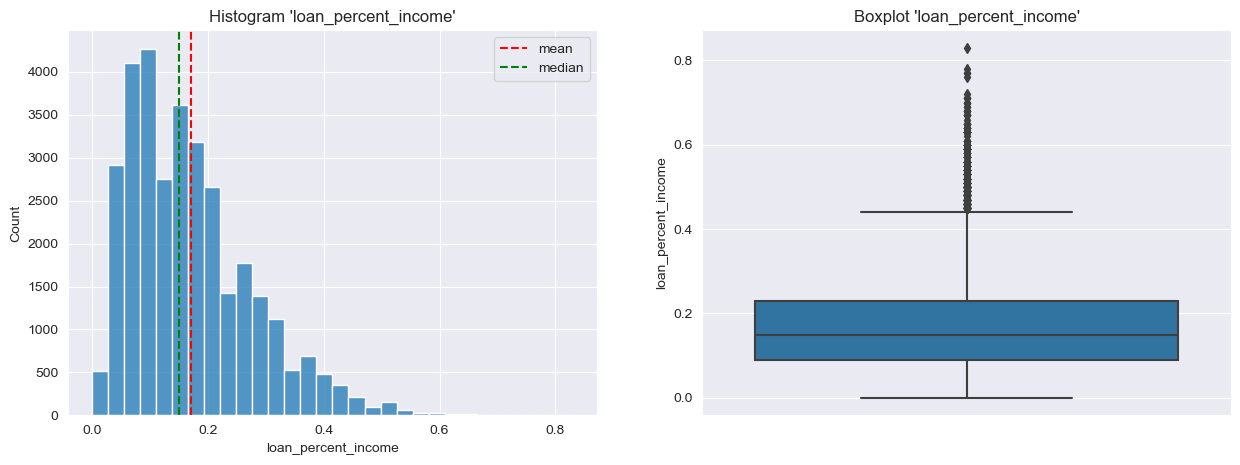

loan_percent_income Kurtosis: 1.2176901242742915
loan_percent_income Skewness: 1.0638113566804195
Columns 'loan_percent_income' is right skewed


In [24]:
plot_dist(df, 'loan_percent_income')

In [25]:
# Descriptive of loan_percent_income by response loan_status
df['loan_percent_income'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,25327.0,0.148794,0.087252,0.00,0.08,0.13,0.20,0.83
1,7089.0,0.246906,0.132103,0.01,0.14,0.24,0.34,0.78


### 2.1.6 Predictor `loan_amnt`

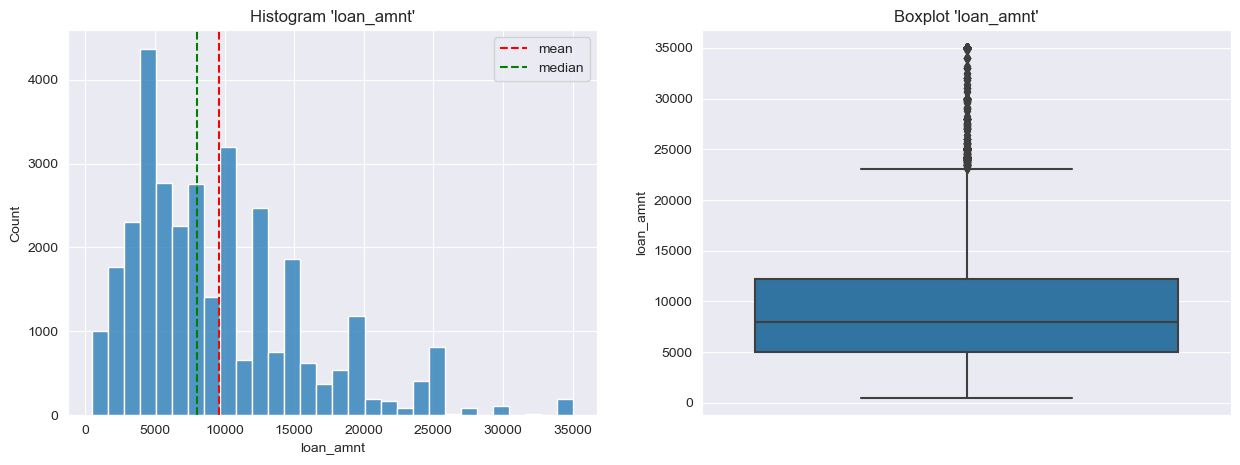

loan_amnt Kurtosis: 1.421251150106877
loan_amnt Skewness: 1.191944385120234
Columns 'loan_amnt' is right skewed


In [26]:
plot_dist(df, 'loan_amnt')

In [27]:
# Descriptive of loan_amnt by response loan_status
df['loan_amnt'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,25327.0,9240.155763,6025.927481,500.0,5000.0,8000.0,12000.0,35000.0
1,7089.0,10857.479898,7143.830869,900.0,5000.0,9600.0,15000.0,35000.0


### 2.1.7 Predictor `cb_person_cred_hist_length`

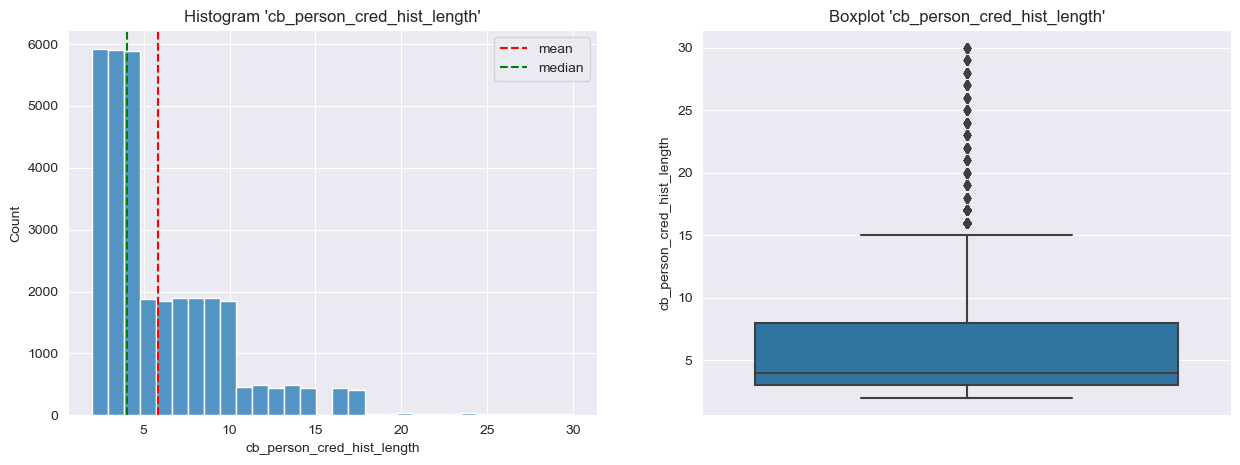

cb_person_cred_hist_length Kurtosis: 3.7058346039099828
cb_person_cred_hist_length Skewness: 1.6593687613558725
Columns 'cb_person_cred_hist_length' is right skewed


In [28]:
plot_dist(df, 'cb_person_cred_hist_length')

In [29]:
# Descriptive of cb_person_cred_hist_length by response loan_status
df['cb_person_cred_hist_length'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,25327.0,5.846725,4.045490,2.0,3.0,4.0,8.0,30.0
1,7089.0,5.684723,4.104833,2.0,3.0,4.0,8.0,30.0


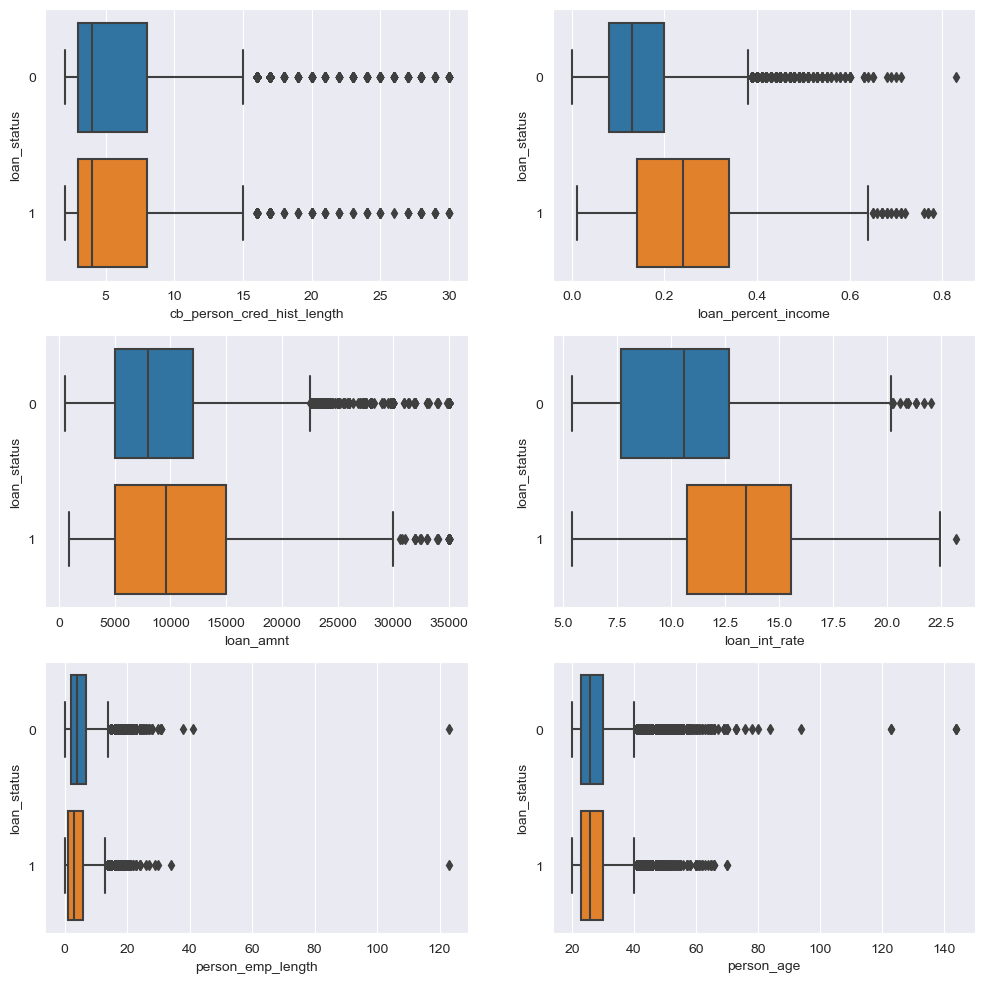

In [30]:
fig, ax = plt.subplots(3, 2, figsize=(12,12))

sns.boxplot(df, x="cb_person_cred_hist_length", y='loan_status', ax=ax[0,0])
sns.boxplot(df, x="loan_percent_income", y='loan_status', ax=ax[0,1])
sns.boxplot(df, x="loan_amnt", y='loan_status', ax=ax[1,0])
sns.boxplot(df, x="loan_int_rate", y='loan_status', ax=ax[1,1])
sns.boxplot(df, x="person_emp_length", y='loan_status', ax=ax[2,0])
sns.boxplot(df, x="person_age", y='loan_status', ax=ax[2,1])

plt.show()

### 2.1.8 Correlation Status of Numerical Values

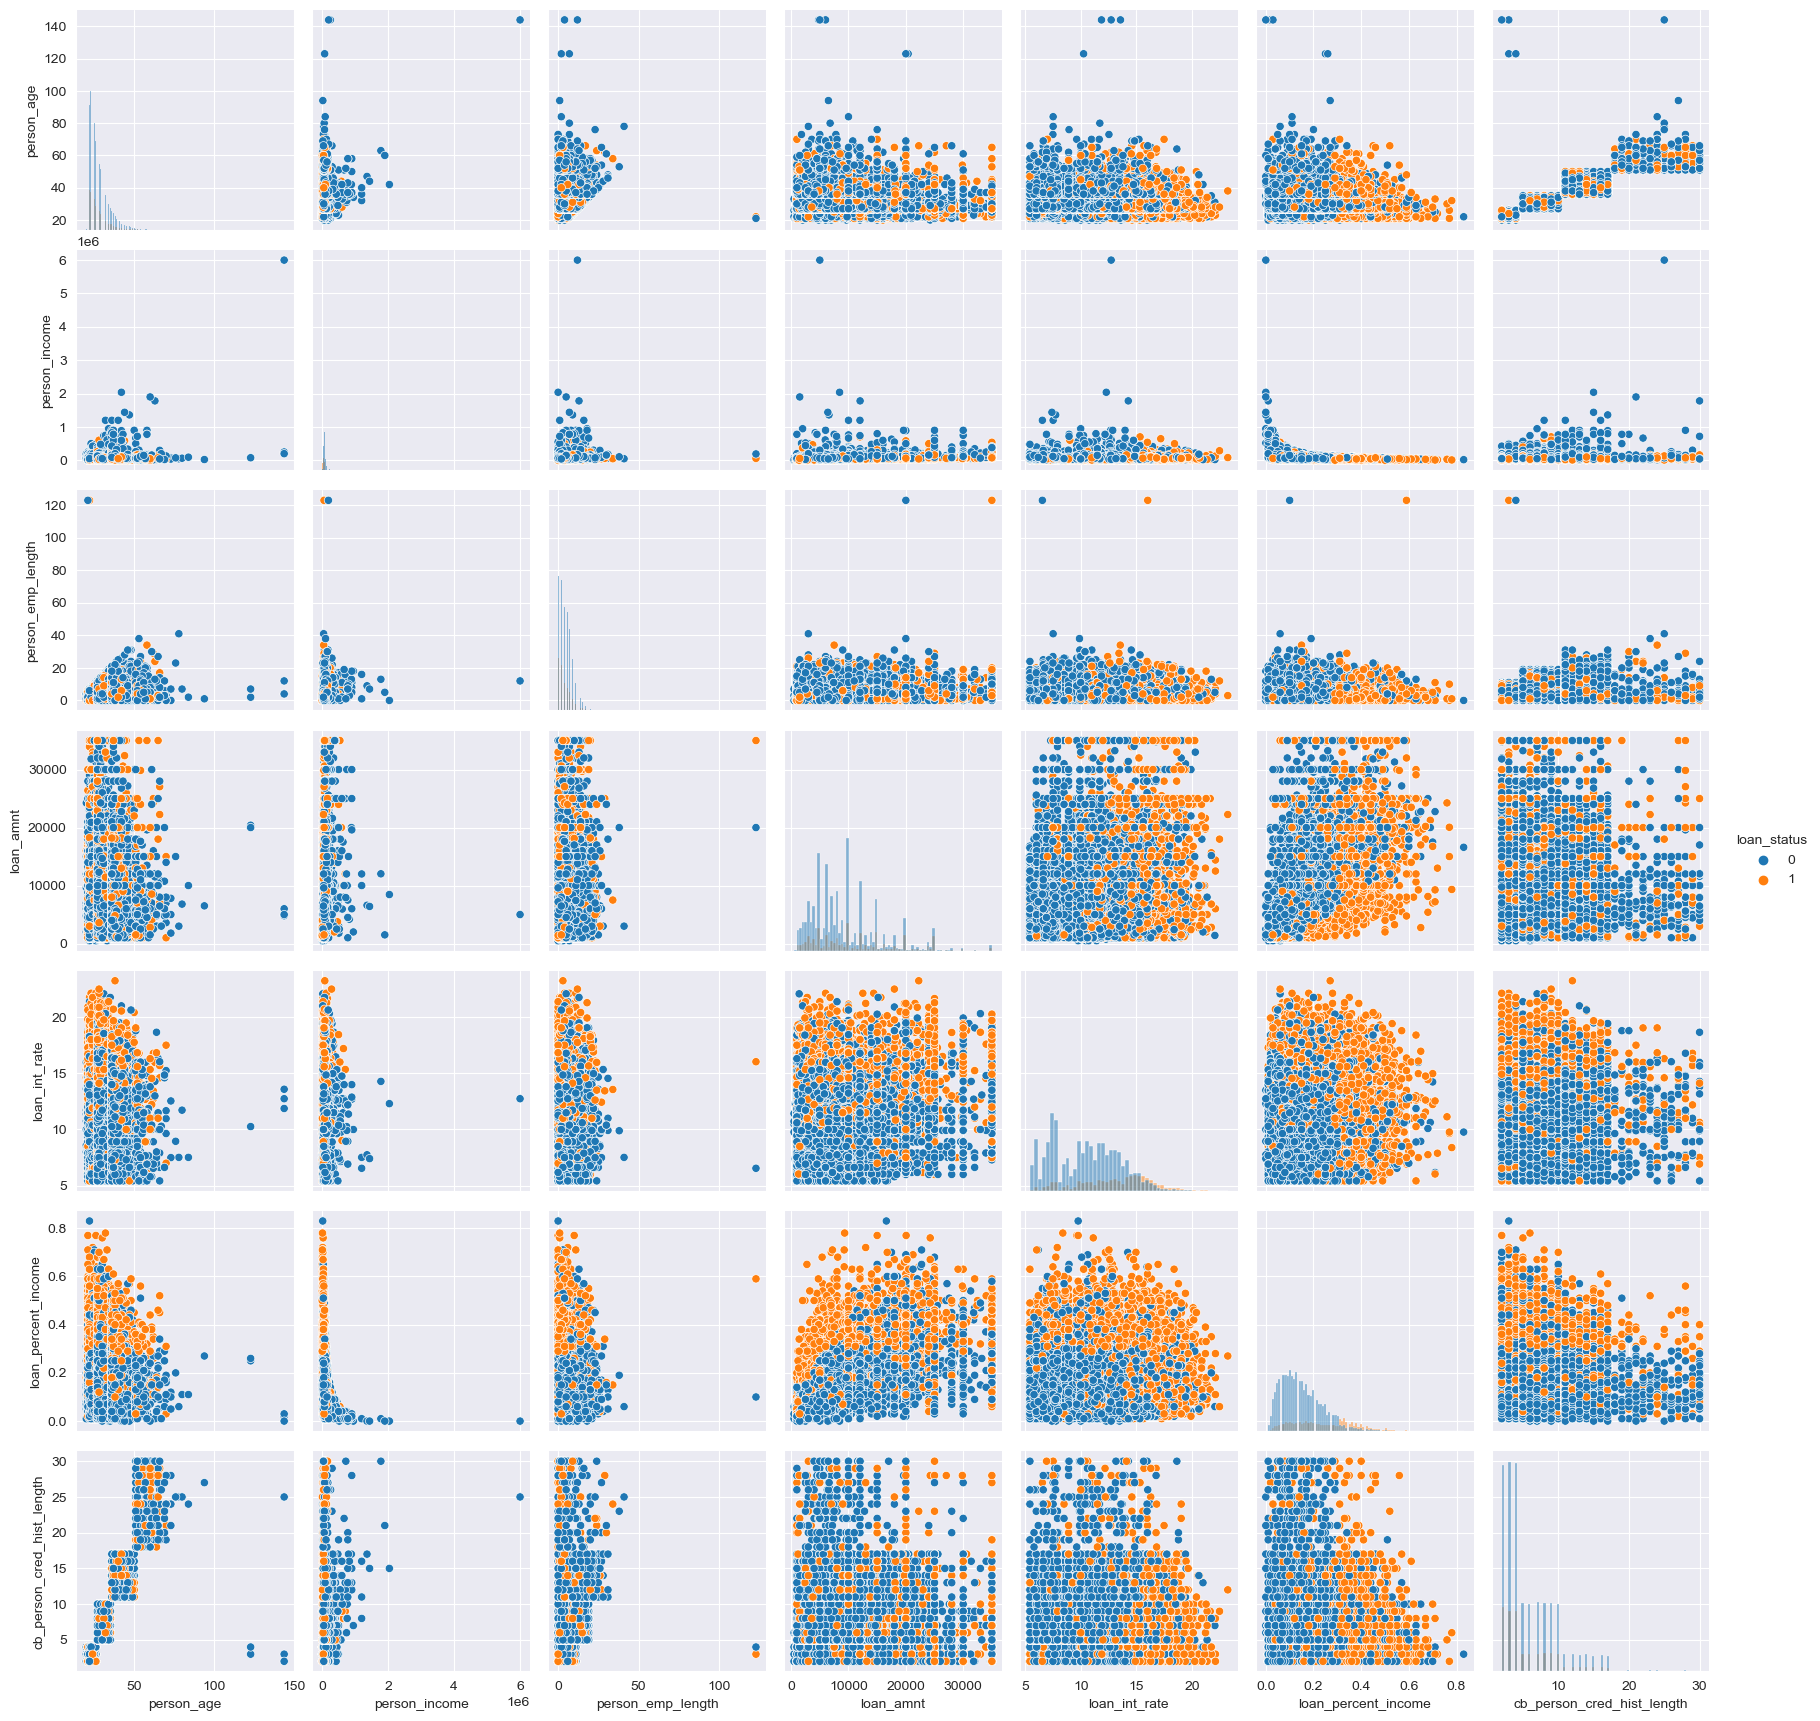

In [31]:
sns.pairplot(df, hue='loan_status', diag_kind='hist')

In [32]:
numerical_values = df[['person_age', 'person_income', 'person_emp_length',
                       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                       'cb_person_cred_hist_length']]

numerical_values.head().T

,0,1,2,3,4
person_age,22.00,21.00,25.00,23.00,24.00
person_income,59000.00,9600.00,9600.00,65500.00,54400.00
person_emp_length,123.00,5.00,1.00,4.00,8.00
loan_amnt,35000.00,1000.00,5500.00,35000.00,35000.00
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_percent_income,0.59,0.10,0.57,0.53,0.55
cb_person_cred_hist_length,3.00,2.00,3.00,2.00,4.00


<Axes: >

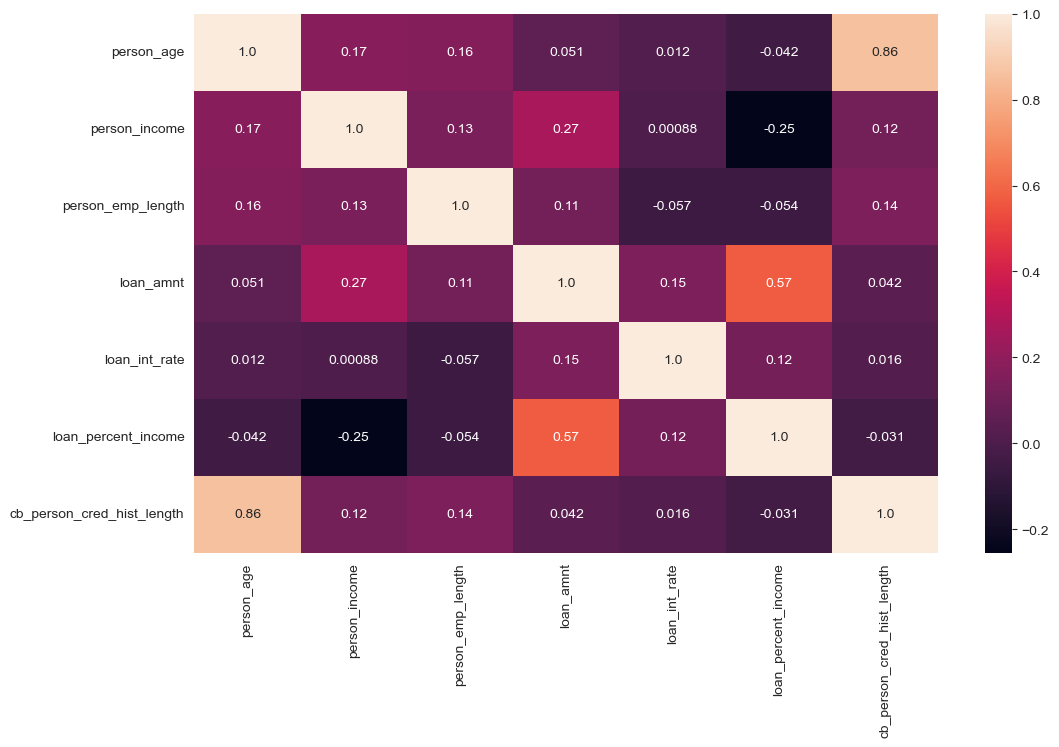

In [33]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(numerical_values.corr(), annot=True, fmt='.2')

## 2.2 Categorical Data Visualisation 

In [34]:
df.head().T

,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
loan_grade,D,B,C,C,C
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1
loan_percent_income,0.59,0.1,0.57,0.53,0.55


In [35]:
categorical_data = df[['loan_grade', 'cb_person_default_on_file',
                       'person_home_ownership', 'loan_intent']]

In [36]:
categorical_data.head().T

,0,1,2,3,4
loan_grade,D,B,C,C,C
cb_person_default_on_file,Y,N,N,N,Y
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL


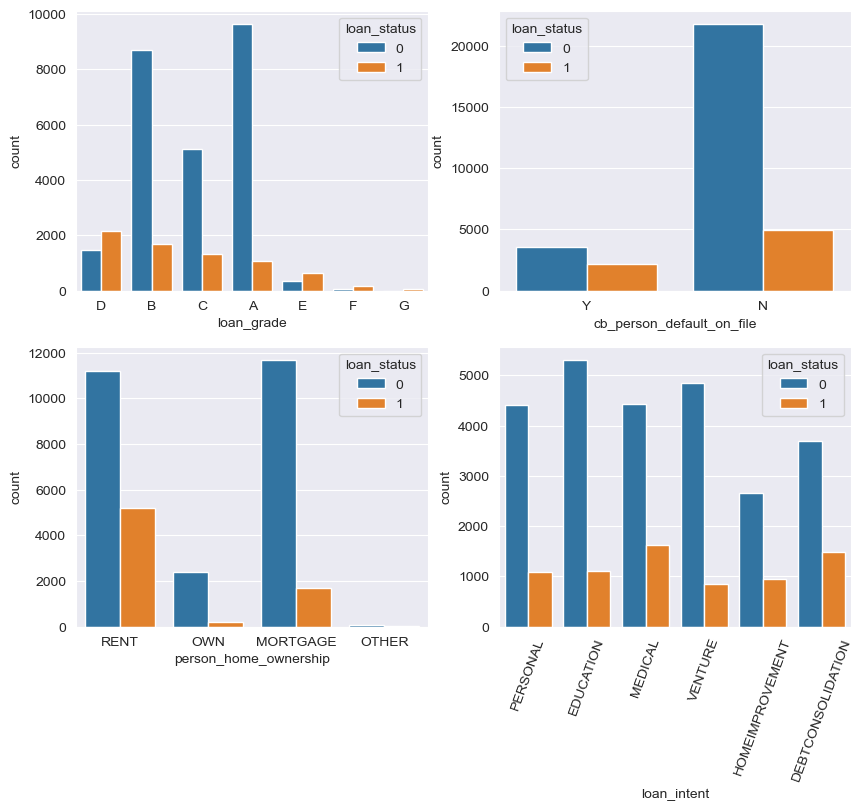

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(10,8))

sns.countplot(df, x='loan_grade', ax=ax[0,0], hue='loan_status')
sns.countplot(df, x='cb_person_default_on_file', ax=ax[0,1], hue='loan_status')
sns.countplot(df, x='person_home_ownership', ax=ax[1,0], hue='loan_status')
sns.countplot(df, x='loan_intent', ax=ax[1,1], hue='loan_status')
plt.xticks(rotation=70)

plt.show()

## 2.3 Calculating the Odds

Mathematically written as :

$$
  Odds =\frac{P}{1 - P}
$$

Where :
- $P$ is probability of success

In [38]:
# Defining funtion to calculating the odds
def calculate_odds(data, predictor_label):
  # Frequency of default by predictor_label
  crosstab = pd.crosstab(data[predictor_label],
                         data['loan_status'],
                         margins = False)

  # Calculate odds
  crosstab['Odds'] = np.round((crosstab[1]/crosstab[0]),2)

  # Sort by the odds value
  crosstab = crosstab.sort_values(by = 'Odds',
                       ascending = False)

  return crosstab

### 2.3.1 Predictor `loan_grade`

In [39]:
# Calculate odds of default from predictor 'loan_grade'
odds_loan_grade = calculate_odds(data = df,
                           predictor_label = 'loan_grade')

odds_loan_grade

loan_status,0,1,Odds
loan_grade,,,
G,1,63,63.00
F,71,170,2.39
E,342,621,1.82
D,1482,2138,1.44
C,5102,1336,0.26
B,8692,1695,0.20
A,9637,1066,0.11


### 2.3.2 Predictor `cb_person_default_on_file`

In [40]:
# Calculate odds of default from predictor 'cb_person_default_on_file'
odds_cb_person_default_on_file = calculate_odds(data = df,
                           predictor_label = 'cb_person_default_on_file')

odds_cb_person_default_on_file

loan_status,0,1,Odds
cb_person_default_on_file,,,
Y,3560,2170,0.61
N,21767,4919,0.23


### 2.3.3 Predictor `person_home_ownership`

In [41]:
# Calculate odds of default from predictor 'person_home_ownership'
odds_home = calculate_odds(data = df,
                           predictor_label = 'person_home_ownership')

odds_home

loan_status,0,1,Odds
person_home_ownership,,,
RENT,11201,5177,0.46
OTHER,73,33,0.45
MORTGAGE,11682,1687,0.14
OWN,2371,192,0.08


### 2.3.4 Predictor `loan_intent`

In [42]:
# Calculate odds of default from predictor 'loan_intent'
odds_intent = calculate_odds(data = df,
                           predictor_label = 'loan_intent')

odds_intent

loan_status,0,1,Odds
loan_intent,,,
DEBTCONSOLIDATION,3701,1488,0.40
MEDICAL,4425,1617,0.37
HOMEIMPROVEMENT,2654,940,0.35
PERSONAL,4404,1094,0.25
EDUCATION,5305,1106,0.21
VENTURE,4838,844,0.17


## 2.4 Test of Indepence

In [43]:
# Import the package
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Create a function of independence test
def independence_test(data, predictor_label, alpha=0.05):
    """
    Function to perform the independence test.

    Parameters
    ----------
    data : array like
      The data label.

    predictor_label : object
      The label of predictor variable.

    alpha : float in range[0,1], default = 0.05
      Probability of Type I Error (reject H0 when H0 is true).

    """
    # Build the contingency table
    crosstab = pd.crosstab(data[predictor_label],
                           data['loan_status'],
                           margins = False)

    # Test whether churn is independent of the predictor
    stats.chi2_contingency(crosstab)

    # Result of independence test
    result = stats.chi2_contingency(crosstab)

    # Extract the test result
    stat = result[0]
    pval = result[1]

    # Print the conclusion
    if pval < alpha:
        print(f"Loan Status and {predictor_label} is not independent with P-val={pval:.3f}.")
    else:
        print(f"Loan Status and {predictor_label} is independent with P-val={pval:.3f}.")

In [44]:
# Perform the independence test
independence_test(data = df,
                  predictor_label = 'loan_grade',
                  alpha = 0.05)

Loan Status and loan_grade is not independent with P-val=0.000.


In [45]:
# Perform the independence test
independence_test(data = df,
                  predictor_label = 'cb_person_default_on_file',
                  alpha = 0.05)

Loan Status and cb_person_default_on_file is not independent with P-val=0.000.


In [46]:
# Perform the independence test
independence_test(data = df,
                  predictor_label = 'person_home_ownership',
                  alpha = 0.05)

Loan Status and person_home_ownership is not independent with P-val=0.000.


In [47]:
# Perform the independence test
independence_test(data = df,
                  predictor_label = 'loan_intent',
                  alpha = 0.05)

Loan Status and loan_intent is not independent with P-val=0.000.


**Conclusion** : 
- All the categorical predictors are not independent to target variable which is `loan_status`, this all of them will be included as predictors for our model.

___________________

## 2.3 Handling Missing Values

In [48]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [49]:
# Querying all records that has missing value.
missing_records = df[df.isnull().any(axis=1)]

In [50]:
missing_records.loan_status.value_counts()

loan_status
0    3014
1     901
Name: count, dtype: int64

In [51]:
missing_records.person_home_ownership.value_counts()

person_home_ownership
RENT        1880
MORTGAGE    1633
OWN          389
OTHER         13
Name: count, dtype: int64

In [52]:
missing_records.loan_intent.value_counts()

loan_intent
MEDICAL              773
EDUCATION            741
VENTURE              713
DEBTCONSOLIDATION    642
PERSONAL             639
HOMEIMPROVEMENT      407
Name: count, dtype: int64

In [53]:
missing_records.loan_grade.value_counts()

loan_grade
A    1358
B    1293
C     756
D     377
E      94
F      32
G       5
Name: count, dtype: int64

In [54]:
missing_records.cb_person_cred_hist_length.value_counts()

cb_person_cred_hist_length
2     733
3     704
4     692
8     234
9     229
7     228
5     219
6     214
10    214
15     67
16     64
17     60
12     59
14     56
13     56
11     52
28      5
27      4
18      4
19      3
23      3
29      3
24      3
30      3
20      2
21      2
22      1
25      1
Name: count, dtype: int64

In [55]:
df_with_nan = df.copy()

df.dropna(inplace=True)
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [56]:
df.shape

(28501, 12)

In [57]:
df.head().T

,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
loan_grade,D,B,C,C,C
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1
loan_percent_income,0.59,0.1,0.57,0.53,0.55


____________________


# 3. Data Cleaning

- Before cleaning the data, ones need to split the data in advance in order to avoid data leak.

In [58]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='loan_status'),
                                                    df['loan_status'],
                                                    stratify=df['loan_status'],
                                                    test_size=0.2, random_state=99)

In [59]:
# Checking current data shape
print("X_train shape : ", X_train.shape)
print("y_train.shape : ", y_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_test.shape : ", y_test.shape)

X_train shape :  (22800, 11)
y_train.shape :  (22800,)
X_test.shape :  (5701, 11)
y_test.shape :  (5701,)


- Replacing the outlier value in `person_age` that have values more than 80 years old to 80 years old.

In [60]:
X_train['person_age'] = X_train['person_age'].apply(lambda x: x if x < 80 else 80)

In [61]:
X_train[X_train['person_age'] > 80]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


- Replacing the outlier value in `person_income` that have values more than 1 million USD into 1 million USD.

In [62]:
X_train['person_income'] = X_train['person_income'].apply(lambda x: x if x < 1000000 else 1000000)

In [63]:
X_train[X_train['person_income'] > 1000000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


- Replacing the outlier value in `person_emp_length` that have values more than 45 years into 45 years.

In [64]:
X_train['person_emp_length'] = X_train['person_emp_length'].apply(lambda x: x if x < 45 else 45)

In [65]:
X_train[X_train['person_emp_length'] > 45]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


# 4. Feature Engineering

In [66]:
numerical_values_train = X_train[['person_age', 'person_income', 'person_emp_length',
                          'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                          'cb_person_cred_hist_length']]

categorical_values_train = X_train[['loan_grade', 'cb_person_default_on_file',
                       'person_home_ownership', 'loan_intent']]

numerical_values_test = X_test[['person_age', 'person_income', 'person_emp_length',
                          'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                          'cb_person_cred_hist_length']]

categorical_values_test = X_test[['loan_grade', 'cb_person_default_on_file',
                       'person_home_ownership', 'loan_intent']]

## 4.1 Feature Scaling

The method for scaling will be MinMaxScaler, features will be transformed by scaling each feature to a given range.

The formula is as follow :
- ``X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))``
- ``X_scaled = X_std * (max - min) + min``

where min, max = feature_range.

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

- Data Train

In [68]:
transformer_num_train = pd.DataFrame(scaler.fit_transform(numerical_values_train),
                                     columns=numerical_values_train.columns)

transformer_num_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,0.133333,0.036145,0.133333,0.275362,0.228605,0.301205,0.214286
1,0.083333,0.053213,0.111111,0.333333,0.457796,0.253012,0.035714
2,0.150000,0.059237,0.111111,0.275362,0.580891,0.192771,0.178571
3,0.300000,0.057681,0.133333,0.347826,0.121336,0.240964,0.500000
4,0.316667,0.036145,0.044444,0.136232,0.070340,0.156627,0.535714
...,...,...,...,...,...,...,...
22795,0.066667,0.045181,0.111111,0.063768,0.087925,0.072289,0.035714
22796,0.066667,0.036141,0.088889,0.130435,0.550996,0.156627,0.035714
22797,0.033333,0.037149,0.044444,0.304348,0.396249,0.325301,0.071429
22798,0.116667,0.124498,0.244444,0.913043,0.333529,0.301205,0.178571


- DataTest

In [69]:
transformer_num_test = pd.DataFrame(scaler.transform(numerical_values_test),
                                     columns=numerical_values_test.columns)

transformer_num_test

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,0.100000,0.065187,0.088889,0.228986,0.694607,0.144578,0.000000
1,0.216667,0.051205,0.155556,0.086957,0.306565,0.072289,0.285714
2,0.183333,0.027610,0.044444,0.107246,0.267878,0.156627,0.178571
3,0.033333,0.021084,0.022222,0.307246,0.246776,0.530120,0.035714
4,0.266667,0.037149,0.133333,0.166667,0.304807,0.180723,0.535714
...,...,...,...,...,...,...,...
5696,0.066667,0.042169,0.177778,0.362319,0.326495,0.337349,0.035714
5697,0.200000,0.164659,0.111111,0.710145,0.577374,0.180723,0.142857
5698,0.066667,0.070285,0.177778,0.217391,0.573857,0.132530,0.035714
5699,0.133333,0.109438,0.200000,0.564493,0.498242,0.216867,0.250000


## 4.2 One-Hot Encoding

- In this section we will encode categorical features as a one-hot numeric array.
- The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features

In [70]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

- Data Train

In [71]:
ohe_train = pd.DataFrame(encoder.fit_transform(categorical_values_train).toarray())

ohe_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22795,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22796,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22797,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
22798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


- Data Test

In [72]:
ohe_test = pd.DataFrame(encoder.fit_transform(categorical_values_test).toarray())

ohe_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5696,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5697,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5698,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5699,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## 4.3 Finalizing Data

In [73]:
X_train_full = pd.concat([transformer_num_train.reset_index(drop=True),
                          ohe_train.reset_index(drop=True)],
                          axis=1)

X_train_full.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,0,1,2,...,9,10,11,12,13,14,15,16,17,18
0,0.133333,0.036145,0.133333,0.275362,0.228605,0.301205,0.214286,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.083333,0.053213,0.111111,0.333333,0.457796,0.253012,0.035714,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.150000,0.059237,0.111111,0.275362,0.580891,0.192771,0.178571,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.300000,0.057681,0.133333,0.347826,0.121336,0.240964,0.500000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.316667,0.036145,0.044444,0.136232,0.070340,0.156627,0.535714,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [74]:
X_test_full = pd.concat([transformer_num_test.reset_index(drop=True),
                          ohe_test.reset_index(drop=True)],
                          axis=1)

X_test_full.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,0,1,2,...,9,10,11,12,13,14,15,16,17,18
0,0.100000,0.065187,0.088889,0.228986,0.694607,0.144578,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.216667,0.051205,0.155556,0.086957,0.306565,0.072289,0.285714,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.183333,0.027610,0.044444,0.107246,0.267878,0.156627,0.178571,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.033333,0.021084,0.022222,0.307246,0.246776,0.530120,0.035714,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.266667,0.037149,0.133333,0.166667,0.304807,0.180723,0.535714,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# 5. Initial Model Building

## 5.1. Likelihood Function

In general, **likelihood function** for the identical and independent observations with binary response:

$$
\mathcal{L} = \prod_{i=1}^{n}\pi(x_{i})^{y_{i}}[1-\pi(x_{i})]^{(1-y_{i})}
$$

In [75]:
# Describe the counts of each response category
count_data = df['loan_status'].value_counts()
count_data

loan_status
0    22313
1     6188
Name: count, dtype: int64

- Assume $\pi(x_{i}) = 0.5$, $\forall i$.

In [76]:
p_success = 0.5
n_success = count_data.loc[1]
n_failed = count_data.loc[0]
eps = 1000

likelihood = (p_success**(n_success/eps)) * ((1-p_success)**(n_failed/eps))
likelihood

2.632352791508159e-09

In [77]:
# Transform likelihood into log-likelihood
log_likelihood = np.log(likelihood)

log_likelihood

-19.755387793139

- We also can adjust/do experiments towards the $\pi(x_{i})$, to adjust the model performance.
- Suppose we have $\pi(x_{i})$ 0.3 and 0.5.

In [78]:
p_success = 0.3
n_success = count_data.loc[1]
n_failed = count_data.loc[0]
eps = 1000

likelihood = (p_success**(n_success/eps)) * ((1-p_success)**(n_failed/eps))
likelihood

# Transform likelihood into log-likelihood
log_likelihood = np.log(likelihood)
log_likelihood

-15.408671737273828

In [79]:
p_success = 0.6
n_success = count_data.loc[1]
n_failed = count_data.loc[0]
eps = 1000

likelihood = (p_success**(n_success/eps)) * ((1-p_success)**(n_failed/eps))
likelihood

# Transform likelihood into log-likelihood
log_likelihood = np.log(likelihood)
log_likelihood

-23.60618406017197

## 5.2 Maximum Likelihood Estimation

The maximum likelihood estimate is the parameter value at which the likelihood function takes its maximum value.

In [80]:
# Assign the estimate value of pi in range [0.1,0.9]
pi = np.arange(0.1, 1, 0.1)

# Define the number of success and failed observations
n_success = count_data.loc[1]
n_failed = count_data.loc[0]

# Likelihood function for 173 crabs observations
likelihood = (pi**n_success/eps)*((1-pi)**n_failed/eps)
likelihood

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

- Plot of likelihood/log-likelihood value for each estimate of $\pi(x_{i})$.

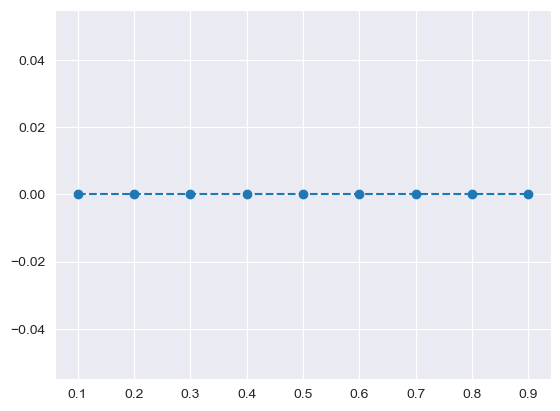

In [81]:
# Plot pi vs likelihood
plt.plot(pi, likelihood, '--o')

- The likelihood values are too small.
- It is easier mathematically to work with log transformation, thus we tranform it into log value as follow :
<br>


$$
\log(\mathcal{L}(\beta)) = \sum_{i=1}^{n}(y_{i}\log[\pi (x_{i})]+(1-y_{i})\log[1-\pi(x_{i})])
$$

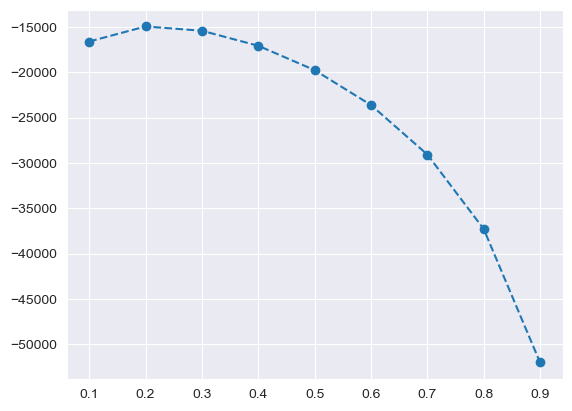

In [82]:
# Calculate log-likelihood
log_likelihood = n_success*np.log(pi) + n_failed*np.log(1-pi)

# Plot pi vs log-likelihood
plt.plot(pi, log_likelihood, '--o')

- The likelihood function for loan data has its maximum at $\pi(x_{i})$ at 0.2, since the proportion of success is 0.64 of the total observations.

## 5.3. Optimization with Gradient Descent

- As we want to maximize likelihood estimate $\pi(x)$ from the n observations, where:
$$
\pi(x) = \frac{e^{(\beta_{0}+\beta_{1}x)}}{1+e^{(\beta_{0}+\beta_{1}x)}}
$$
- Hence, we need to find $\beta_{0}$ and $\beta_{1}$ that maximize the likelihood.
- We call this the optimum $\beta_{0}$ and $\beta_{1}$.
- To find the optimum $\beta_{0}$ and $\beta_{1}$, we maximize the likelihood/log-likelihood function, or we minimize the **negative log-likelihood**:
$$
-\log(\mathcal{L}(\beta)) = -\sum_{i=1}^{n}(y_{i}\log[\pi (x_{i})]+(1-y_{i})\log[1-\pi(x_{i})])
$$
- We find the optimum parameter $\beta_{j}$ where:
$$
\frac{\partial \text{NLL}}{\partial \beta_{j}}=0 \;\;\;\;\;\text o \text r:
$$
$$
\sum_{i=1}^{n}\left [ \pi(x_{i})-y_{i} \right ]x_{j}=0, \;\;\;\;j=1,2,\dots,p
$$

**Optimization Algorithm:**
1. Define the response variable ($y$) and the explanatory variable ($X$).
2. Initialize parameter estimate $\beta_{0}=0.0$ and $\beta_{1}=0.0$.
3. Calculate the gradient $\frac{\partial \text {NLL}}{\partial \beta_{j}}$, thus we have the gradient of $\beta_{0}$ and $\beta_{1}$.
4. Update the new $\beta_{0}$ and $\beta_{1}$:
$$
\beta _{j}^{new} = \beta _{j}^{old} - \eta \; \frac{\partial \text{NLL}}{\partial \beta _{j}^{old}}
$$
7. Repeat step 2-4 until converge:
  - $\Delta \beta_{j} < \text{tolerance}$, or
  - $\nabla_{\beta_{j}} \text{NLL} < \text{tolerance}$
    - Note: $\nabla$ is the differential nabla operator or gradient, acting to a differentiable function.

In [83]:
# Function to initialize parameter estimate
def initialize_parameter(X):
    """
    Function to initialize the parameter estimate or coeficient.

    Parameters
    ----------
    X   : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictor

    Returns
    -------
    b_0 : float
        The intercept

    b_1 : {array-like} of shape (n_predictors, 1)
        The slope/weights
    """
    # Extract the number of predictors
    n_parameters = X_train_full.shape[1]

    # Initialize the parameter estimate
    b0_initial = 0.0
    b1_initial = np.zeros(n_parameters)

    return b0_initial, b1_initial

In [84]:
# Initialize b0 and b1
b0_initial, b1_initial = initialize_parameter(X_train_full)
b0_initial, b1_initial

(0.0,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]))

**Calculate the success probability $\pi(x_{i})$ and cost function (log loss or negative log-likelihood).**
- Before calculate the gradient of $\beta_{0}$, $\beta_{1}$, and log loss, we need information about $y_{i}$ and $\pi(x_{i})$, where:
$$
\pi(x) = \frac{e^{(\beta_{0}+\beta_{1}x)}}{1+e^{(\beta_{0}+\beta_{1}x)}}
$$
- And we need additional information about log loss value of each iteration, thus we know the log loss value of the optimum $\beta_{0}$ and $\beta_{1}$ where:
$$
-\log(\mathcal{L}(\beta)) = -\sum_{i=1}^{n}(y_{i}\log[\pi (x_{i})]+(1-y_{i})\log[1-\pi(x_{i})])
$$

In [85]:
# Sigmoid function to calculate success probability (pi) of each observation
def sigmoid(X, b0, b1):
    """
    Function to calculate the success probability of X.

    Parameters
    ----------
    X   : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictor

    b_0 : float
        The intercept

    b_1 : {array-like} of shape (n_predictors, 1)
        The slope/weights

    Returns
    -------
    pi  : {array-like} of shape (n_sample, 1)
        The success probability of X
    """
    # Calculate the logit value
    logit = b0 + np.dot(X, b1)

    # Calculate the success probability
    pi = np.exp(logit) / (1+np.exp(logit))

    return pi

In [86]:
# Calculate pi from b0 and b1 initial for each observation
pi = sigmoid(X = X_train_full,
             b0 = b0_initial,
             b1 = b1_initial)
pi[0:3]

array([0.5, 0.5, 0.5])

- Then, we can calculate log loss or negative log-likelihood as cost function.
$$
-\log(\mathcal{L}(\beta)) = -\sum_{i=1}^{n}(y_{i}\log[\pi (x_{i})]+(1-y_{i})\log[1-\pi(x_{i})])
$$
- Break the function above into two parts:
  - `log_like_success =` $\sum_{i=1}^{n}(y_{i}\times \log[\pi (x_{i})])$ --> log loss value when $y_{i}=1$
  - `log_like_failure =` $\sum_{i=1}^{n}((1-y_{i})\times \log[1-\pi(x_{i})])$ --> log loss value when $y_{i}=0$
- Thus, the cost function log loss: `log_loss = -(log_like_success + log_like_failure)`

In [87]:
# Function to calculate the negative log likelihood (log loss) as cost function
def cost_function(y, pi, eps=1e-10):
    """
    Function to calculate the negative log-likelihood (log loss).

    Parameters
    ----------
    y   : {array-like} of shape (n_sample, )
        The dependent or response variable

    pi  : {array-like} of shape (n_sample, 1)
        The success probability of X

    eps : float
        The additional weight to avoid log of zero value

    Returns
    -------
    log_loss  : float
        The negative value of log-likelihood
    """
    # Calculate the log-likelihood value when y=1
    log_like_success = y * np.log(pi + eps)

    # Calculate the log-likelihood value when y=0
    log_like_failure = (1-y) * np.log(1-pi + eps)

    # Calculate the negative log-likelihood or log loss
    log_like_total = log_like_success + log_like_failure
    log_loss = -np.sum(log_like_total)
    
    return log_loss

In [88]:
# Calculate log loss
log_loss = cost_function(y = np.array(y_train),
                         pi = pi)
log_loss

15803.755712206752

**3. Calculate the gradient $\frac{\partial \text N \text L \text L}{\partial \beta}$.**
- Derivative of log loss or negative log-likelihood (NLL) w.r.t. $\beta_{j}$:
$$
\frac{\partial \text{NLL}}{\partial \beta_{j}}=\sum_{i=1}^{n}\left [ \pi(x_{i})-y_{i} \right ]x_{j}$$
with $j=1,2,\dots,p$ and $p$ is the number of parameter.
- Thus, derivative of log loss or negative log-likelihood (NLL) w.r.t. $\beta_{0}$:
$$
\frac{\partial \text N \text L \text L}{\partial \beta_{0}}=\sum_{i=1}^{n}\left [ \pi(x_{i})-y_{i} \right ]x_{0}
$$
  - We don't have $x_{0}$ in the data.
  - We can assume $x_{0}=1$ without changing the logit equation :
  $$
  \begin{align*}
  \text{logit}&=\beta_{0}(x_{0})+\beta_{1}(x_{1}) \\
  &=\beta_{0}(1)+\beta_{1}(x_{1}) \\
  \text{logit}&=\beta_{0}+\beta_{1}(x_{1}) \\
  \end{align*}
  $$
  - Thus, the gradient of $\beta_{0}$:
$$
\frac{\partial \text{NLL}}{\partial \beta_{0}}=\sum_{i=1}^{n}\left [ \pi(x_{i})-y_{i} \right ]
$$

In [89]:
# Calculate derivative of log loss w.r.t b0
def gradient_b0(pi, y):
    """
    Function to calculate the gradient of log loss w.r.t the intercept.

    Parameters
    ----------
    pi  : {array-like} of shape (n_sample, 1)
        The success probability of X

    y   : {array-like} of shape (n_sample, )
        The dependent or response variable

    Returns
    -------
    grad_b0  : float
        The gradient of log loss w.r.t the intercept
    """
    # Calculate the gradient of log loss w.r.t b0
    grad_b0 = np.sum(pi-y)

    return grad_b0

In [90]:
# Calculate the gradient of b0
grad_b0 = gradient_b0(pi = pi,
                      y = np.array(y_train))
grad_b0

6450.0

- Derivative of log loss or negative log-likelihood (NLL) w.r.t. $\beta_{1}$:
$$
\frac{\partial \text {NLL}}{\partial \beta_{1}}=\sum_{i=1}^{n}\left [ \pi(x_{i})-y_{i} \right ]x_{1}
$$
  - We only have one variable $x$, so $x_{1}=x$, which is:
  - `X = data[["Width"]].to_numpy()`


  - Thus, the gradient of $\beta_{1}$:
$$
\frac{\partial \text {NLL}}{\partial \beta_{1}}=\sum_{i=1}^{n}\left [ \pi(x_{i})-y_{i} \right ]x
$$

In [91]:
# Calculate derivative of log loss w.r.t b1
def gradient_b1(X, pi, y):
    """
    Function to calculate the gradient of log loss w.r.t the slope/weights.

    Parameters
    ----------
    X   : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictor

    pi  : {array-like} of shape (n_sample, 1)
        The success probability of X

    y   : {array-like} of shape (n_sample, )
        The dependent or response variable

    Returns
    -------
    grad_b1  : {array-like} of shape (n_predictors, 1)
        The gradient of log loss w.r.t the slope/weights
    """
    # Calculate the gradient of log loss w.r.t b0
    grad_b1 = np.dot((X.T),(pi-y))

    return grad_b1

In [92]:
# Calculate the gradient of b1
grad_b1 = gradient_b1(X = X_train_full,
                      pi = pi,
                      y = np.array(y_train))
grad_b1

array([ 855.90833333,  485.69113404,  762.52222222, 1516.96594203,
       1521.17966002,  855.9939759 ,  895.92857143, 3017.5       ,
       2476.        , 1354.5       , -241.        , -102.5       ,
        -34.        ,  -20.5       , 5963.5       ,  486.5       ,
       3515.        ,   19.        ,  747.5       , 2168.5       ,
        782.        , 1472.        ,  618.5       ,  965.        ,
       1191.5       , 1421.        ])

**4. Optimization using Gradient Descent Algorithm.**

- Here we will update the new $\beta_{0}$, $\beta_{1}$, and its log loss value iteratively, where:
$$
\beta _{j}^{new} = \beta _{j}^{old} - \eta \; \frac{\partial \text{NLL}}{\partial \beta _{j}^{old}}
$$
  - $\eta$ = `eta` is the designated learning rate.
- Keep updating $\beta _{0}$ and $\beta _{1}$ until converge on the optimum value of $\beta _{0}$ and $\beta _{1}$, where $\nabla_{\beta_{j}} \text{NLL} < \text{tolerance}$, thus:
  - `if (abs(grad_b0) < tol and (abs(grad_b1) < tol`
  - `tol` is the designated tolerance value for stopping the iteration.


In [93]:
# Function to optimize b0 and b1 using gradient descent algorithm
def gradient_descent(X, y, eta=0.01, tol=1e-4):
    """
    Function to calculate the gradient of log loss w.r.t the slope/weights.

    Parameters
    ----------
    X   : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictor

    y   : {array-like} of shape (n_sample, )
        The dependent or response variable

    eta : float, default=0.01
        The designated learning rate

    tol : float, default=1e-4
        The tolerance of gradient to stop the iteration
        The iteration will stop if (the gradient of b0 and b1) < tol

    Returns
    -------
    b0  : float
        The optimum parameter estimate of intercept

    b1  : {array-like} of shape (n_predictors, 1)
        The optimum parameter estimate of slope/weights

    iterations  : {array-like} of shape (i, 1)
                The list of iterations to find the optimum estimate

    log_loss    : {array-like} of shape (i, 1)
                The list of log loss until the iteration stop
    """
    # Define initial b0 and b1
    b0_initial, b1_initial = initialize_parameter(X)

    # Make a list of iteration and log loss value for each iteration
    i = 0
    iterations = []
    log_loss_list = []

    # Make a criteria to run the iteration
    continue_iteration = True

    # Running the iteration
    while(continue_iteration):
        # Update i
        i += 1

        # Calculate success probability (pi) from the current b0 and b1
        pi = sigmoid(X,b0_initial,b1_initial)

        # Calculate log loss from the current b0 and b1
        log_loss = cost_function(y,pi)

        # Calculate gradient of b0 and b1
        grad_b0 = gradient_b0(pi,y)
        grad_b1 = gradient_b1(X,pi,y)

        # Updating the new b0 and b1 from the gradient of b0 and b1
        # Divide the gradient by n_sample to accelerate the optimum point
        b0 = b0_initial - eta*grad_b0/len(y)
        b1 = b1_initial - eta*grad_b1/len(y)

        # Stop when (the gradient of b0 and b1) < tolerance,
        if (abs(grad_b0) < tol) and (abs(grad_b1) < tol):
            return b0, b1, iterations, log_loss_list

        # Update b0 and b1 for the next iteration
        b0_initial = b0
        b1_initial = b1

        # Append the iteration and log loss value to the list
        iterations.append(i)
        log_loss_list.append(log_loss)

- I've run the training for 2.5 hours, but since we got many of predictors and the gradient descent have huge computatinal cost the model hasn't converged yet.
- Thus we can use closed form formula.
- We can us library to perform it

$$
\theta = (X^T X)^{-1} X^Ty
$$

where :

$X=[x1,…,xn]$ and $y=[y1,…,yn]$

In [94]:
# Find the optimum b0 and b1
# b0, b1, iterations_list, log_loss_list = gradient_descent(X = X_train_full,
#                                                           y = np.array(y_train),
#                                                           eta = 0.01,
#                                                           tol = 1e-4)

In [95]:
# # Print the result
# print(f"The gradient converge at iteration : {iterations_list[-1]}")
# print(f"With the log loss                  : {log_loss_list[-1]:.3f}")
# print(f"The optimum parameter:")
# print(f" - intercept (b0) : {b0:.4f}")
# print(f" - weights (b1)   : {b1[0]:.4f}")

# 6. Modelling with Library

## 6.1. Logistic Regression with Statsmodels

In [96]:
# Import the package
import statsmodels.api as sm

# Add constant to x --> logit = b0 + b1(x)
# Not adding constant --> logit = b1(x)
X_sm = sm.add_constant(X_train_full)

# Model fitting
model_sm = sm.Logit(endog = np.array(y_train),
                    exog = X_sm)
result_sm = model_sm.fit()

Optimization terminated successfully.
         Current function value: 0.333675
         Iterations 8


In [97]:
# Print the model result
print(result_sm.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                22800
Model:                          Logit   Df Residuals:                    22777
Method:                           MLE   Df Model:                           22
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.3623
Time:                        01:01:16   Log-Likelihood:                -7607.8
converged:                       True   LL-Null:                       -11929.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3858        nan        nan        nan         nan         nan
person_age                    -0.7986      0.421     -1.895      0.058      -1.625 

## 6.2 Logistic Regression with SKLearn

In [98]:
# Import the package
from sklearn.linear_model import LogisticRegression

X_train_full.columns = X_train_full.columns.astype(str)

# Modelling with sklearn
model_sk = LogisticRegression(penalty='none').fit(X=X_train_full,
                                                  y = np.array(y_train))

c:\Users\daniel.satria\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\daniel.satria\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
# Print the parameter estimate of b0
b0_sk = model_sk.intercept_
b0_sk

array([-1.39146913])

In [100]:
# Print the parameter estimate of b1
b1_sk = model_sk.coef_
b1_sk

array([[-0.71493581,  2.74661706, -0.6720767 , -3.86765333,  1.90455914,
        11.4104188 ,  0.24202316, -2.04072498, -1.97054604, -1.9618108 ,
         0.12245947,  0.28992248,  0.62086282,  3.54836792, -0.71811331,
        -0.67335582, -0.2036652 ,  0.1097295 , -1.9593649 ,  0.66183147,
         0.21528078, -0.61339504,  0.28512485,  0.07702747, -0.44071079,
        -0.9147964 ]])

# 7. Model Evaluation

## 7.1 Classification Score

In [101]:
X_test_full.columns = X_test_full.columns.astype(str)

y_predict_train = model_sk.predict(X_train_full)
y_predict_test = model_sk.predict(X_test_full)

In [102]:
from sklearn.metrics import classification_report

print(classification_report(np.array(y_train), y_predict_train))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     17850
           1       0.77      0.57      0.65      4950

    accuracy                           0.87     22800
   macro avg       0.83      0.76      0.79     22800
weighted avg       0.86      0.87      0.86     22800



In [103]:
print(classification_report(np.array(y_test), y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4463
           1       0.76      0.54      0.63      1238

    accuracy                           0.86      5701
   macro avg       0.82      0.75      0.77      5701
weighted avg       0.85      0.86      0.85      5701



### 7.1.1 Precision 

- Precision is the ratio between the `True Positives` and all the Positives.
- To put it simple, it can be viewed to solved this question : `What proportion of positive identifications was actually correct?` 
- For our problem statement, that would be the measure of `loan_status` with values of `1` that we correctly identify as `1`.  Mathematically written as :  

$$Precision = \frac {TP}{TP+FP}$$

- Where : `TP` is `True Positive` and `FP` is `False Positive`.
- A model that produces no false positives has a precision of 1.0.
- Precision gives us a measure of the relevant data points. It is important that we don’t treat a customer who actually the loan rejected but our model predicted it as approved.

### 7.1.2 Recall 

- The recall is the measure of our model correctly identifying `True Positives`. 
- To put it simple, it can be viewed to solved this question : `What proportion of positive identifications was actually correct?` 
- Thus, for all the customers who actually the `loan_status` are `1`, recall tells us how many we correctly identified as having a `1` in the `loan_status`. Mathematically:


$$Precision = \frac {TP}{TP+FN}$$

- Where : `TP` is `True Positive` and `FP` is `False Negative`.
- A model that produces no false negatives has a recall of 1.0.

## 7.2 Confusion Matrix

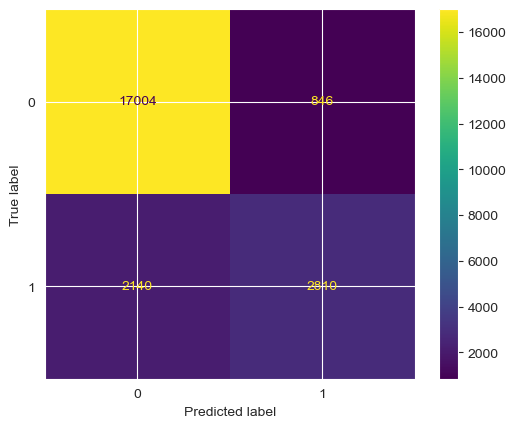

In [104]:
# Importing Confusion Matrix Library
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Displaying confusion matrix for data train
cm = confusion_matrix(y_train, y_predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=y_test.values.unique())

disp.plot()
plt.show()

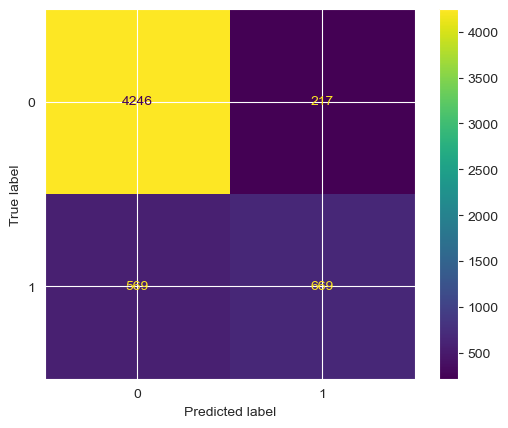

In [105]:
# Displaying confusion matrix for data test
cm = confusion_matrix(y_test, y_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=y_test.values.unique())

disp.plot()
plt.show()

- In the plot above we can see the detail information of how many predicted labels are true.

## 7.3 ROC-AUC Score

- ROC curves typically feature true positive rate (TPR) on the Y axis, and false positive rate (FPR) on the X axis. This means that the top left corner of the plot is the “ideal” point - a FPR of zero, and a TPR of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better. The “steepness” of ROC curves is also important, since it is ideal to maximize the TPR while minimizing the FPR.

- ROC curves are typically used in binary classification, where the TPR and FPR can be defined unambiguously. In the case of multiclass classification, a notion of TPR or FPR is obtained only after binarizing the output.

Source : [scikit-learn.org](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

$$
TPR=\frac{\sum_{c}TP_c}{\sum_{c}(TP_c + FN_c)}
$$

$$
FPR=\frac{\sum_{c}FP_c}{\sum_{c}(FP_c + TN_c)}
$$

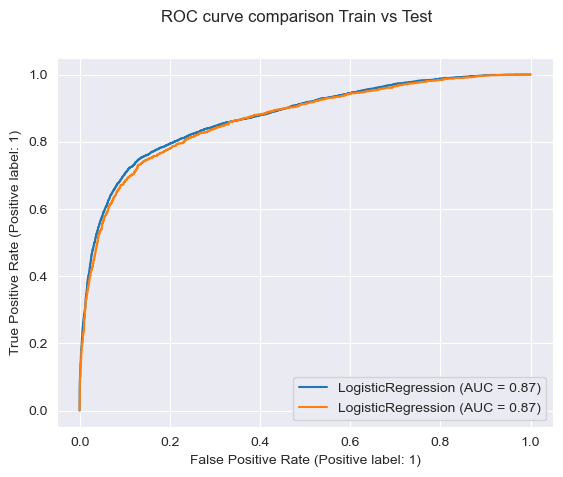

In [106]:
from sklearn.metrics import RocCurveDisplay

roc_train = RocCurveDisplay.from_estimator(model_sk, X_train_full, np.array(y_train))
roc_test = RocCurveDisplay.from_estimator(model_sk, X_test_full, np.array(y_test), ax=roc_train.ax_)
roc_test.figure_.suptitle("ROC curve comparison Train vs Test")

plt.show()

# 8. Model Interpretation

## 8.1 Median Effective Level

1. Calculate the median effective level ($EL_{50}$) of the given predictors ($x$).
$$
EL_{50} = -\beta_{0}/\beta_{1}
$$

In [107]:
median_el = -b0_sk/b1_sk
median_el

array([[-1.9462854 ,  0.50661199, -2.07040229, -0.3597709 ,  0.73059907,
         0.12194724,  5.74932213, -0.68185039, -0.70613378, -0.70927794,
        11.36269082,  4.79945231,  2.24118612,  0.39214342, -1.9376735 ,
        -2.0664693 , -6.83214002, 12.68090324, -0.71016334,  2.10245236,
         6.46350838, -2.26847145,  4.88020997, 18.06458334, -3.15732942,
        -1.52106974]])

In [108]:
encoder.categories_

[array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object)]

**Conclusion**
- Given a record as above, the estimated probability of a loan accepted at the rate of median_el*b1 per one unit of respective value.

## 8.2 Odds Ratio Interpretation

In [109]:
X_train_full.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18'],
      dtype='object')

In [110]:
odds_ratio_age = np.exp(b1_sk[0][0])

odds_ratio_age

0.4892235141301585

Interpretation: the estimated odds of a loan accepted is multiply by odds_ratio for one increase in customers age.


In [111]:
odds_ratio_income = np.exp(b1_sk[0][1])

odds_ratio_income

15.589803211950143

In [112]:
odds_ratio_emp_length = np.exp(b1_sk[0][2])

odds_ratio_emp_length

0.5106470177809549

In [113]:
odds_ratio_loan_amnt = np.exp(b1_sk[0][3])

odds_ratio_loan_amnt

0.020907374523845636

In [114]:
odds_ratio_int_rate = np.exp(b1_sk[0][4])

odds_ratio_int_rate

6.7164459617534344

In [115]:
odds_ratio_per_income = np.exp(b1_sk[0][5])

odds_ratio_per_income

90257.2134757744

In [116]:
odds_ratio_cred_length = np.exp(b1_sk[0][6])

odds_ratio_cred_length

1.2738236983492008

- Looking the odds of a loan accepted given a certain record?

In [117]:
sample = df.sample(1, random_state=342303)

In [118]:
sample.T

,9036
person_age,23
person_income,50000
person_home_ownership,RENT
person_emp_length,7.0
loan_intent,DEBTCONSOLIDATION
loan_grade,D
loan_amnt,8000
loan_int_rate,16.02
loan_status,1
loan_percent_income,0.16


In [119]:
categorical_data_sample = sample[['loan_grade', 'cb_person_default_on_file',
                       'person_home_ownership', 'loan_intent']]

numerical_values_sample = sample[['person_age', 'person_income', 'person_emp_length',
                          'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                          'cb_person_cred_hist_length']]

In [120]:
numerical_values_sample

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
9036,23,50000,7.0,8000,16.02,0.16,3


In [121]:
sample_scaled = pd.DataFrame(scaler.transform(numerical_values_sample),
                            columns=numerical_values_sample.columns)

sample_ohe = pd.DataFrame(encoder.transform(categorical_data_sample).toarray())

sample_full = pd.concat([sample_scaled, sample_ohe],
                        axis=1)

sample_full

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,0,1,2,...,9,10,11,12,13,14,15,16,17,18
0,0.05,0.046185,0.155556,0.217391,0.621336,0.192771,0.035714,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [122]:
# Make a function of logit
def logit(X, b0, b1):
    """
    Function to calculate the logit or log odds value.

    Parameters
    ----------
    X   : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictor

    b0  : float
        The optimum parameter estimate of intercept

    b1  : {array-like} of shape (n_predictors, 1)
        The optimum parameter estimate of slope/weights

    Returns
    -------
    log_odds : {array-like} of shape (n_sample, 1)
          The logit or log odds value
    """

    # log_odds function
    log_odds = b0 + np.sum(b1*X)

    return log_odds

In [123]:
logit_sample = logit(X=sample_full.to_numpy()[0], b0=b0_sk, b1=b1_sk[0])
odds_sample = np.exp(logit_sample)
odds_sample

array([4.1677209])

In [124]:
sample_full.columns = sample_full.columns.astype(str)

# Predicting given records with out model
model_sk.predict(sample_full)

array([1], dtype=int64)

**Conclusion** :

- The model successfuly predicted the loan will accepted.
- This calculation the same with the theorical theory of sigmoid function.
- The additiona of one value in age of customer, increase the loan approval by 0.4892235141301585
- The additiona of one value in employment length of customer, increase the loan approval by 0.5106470177809549
- The additiona of one value in income of customer, increase the loan approval by 15.589803211950143
- The additiona of one value in loan amount of customer, increase the loan approval by 0.020907374523845636
- The additiona of one value in credit length of customer, increase the loan approval by 1.2738236983492008
- The additiona of one value in income rate of customer, increase the loan approval by 6.7164459617534344
- The additiona of one value in percentage income of customer, increase the loan approval by 90257.2134757744

## 8.3 Predicted Probabilities

We already have a function to calculate the predicted probabilities; the `sigmoid()` function that results the success probabilities $\pi(x)$.

$$
\pi(x) = \frac{e^{(\beta_{0}+\beta_{1}x)}}{1+e^{(\beta_{0}+\beta_{1}x)}}
$$


We will predict the predicted probabilities of a given records with the aforementioned function.

In [125]:
# Sigmoid function to calculate success probability (pi) of each observation
def sigmoid(X, b0, b1):
    """
    Function to calculate the success probability of X.

    Parameters
    ----------
    X   : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictor

    b_0 : float
        The intercept

    b_1 : {array-like} of shape (n_predictors, 1)
        The slope/weights

    Returns
    -------
    pi  : {array-like} of shape (n_sample, 1)
        The success probability of X
    """
    # Calculate the logit value
    logit = b0 + np.dot(X, b1)

    # Calculate the success probability
    pi = np.exp(logit) / (1+np.exp(logit))

    return pi

In [126]:
pi_sample = sigmoid(X=sample_full.to_numpy()[0], b0=b0_sk, b1=b1_sk[0])

pi_sample

array([0.8064911])

**Conclusion** : 

- The estimated probability of a customer given record  ($\pi(sample)$) = `pi_sample` is more than 0.5.
- Thus, we classify the client loan will be accepted.
- This result the same with our predicted label with the we built with sklearn.

# 8.4 Significance Testing

- Null Hypothesis: the probability of a customer's loan accepted is **independent** of previous defined predictors.
- Alternative Hypothesis: the probability of a customer's loan acceptedis **not independent** of previous defined predictors.
  - $\text H_{0} : \beta_{1} = 0$
  - $\text H_{1} : \beta_{1} \neq 0$

- We already have the test statistic and its P-value from `statsmmodels` output summary.

In [127]:
# Print the model result
print(result_sm.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                22800
Model:                          Logit   Df Residuals:                    22777
Method:                           MLE   Df Model:                           22
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.3623
Time:                        01:01:18   Log-Likelihood:                -7607.8
converged:                       True   LL-Null:                       -11929.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3858        nan        nan        nan         nan         nan
person_age                    -0.7986      0.421     -1.895      0.058      -1.625 

- Rejection region: reject null hypothesis ($\text H_{0}$)
if $\text{P-value}<\alpha$, thus for parameter estimate $\beta_{1}$:
  - `P>|z|` < 0.05, we reject $\text H_{0}$ at $\alpha=0.05$.

**Conclusion** :

- The probability of a customer's loan accepted is not independent.
- For model improvement, we may take out some predictors like : person age and credit length since the p-value is more than alpha.

# 9. Model Improvement

The improvement will be conducted as follow :
- Make the model less complex.
- Binning the predictors to make the model more general.
- Do not remove the missing value but reassign into a new bin/category.

## 9.1 Binning

In [128]:
# Create a function for binning the numerical predictor
def create_binning(data, predictor_label, num_of_bins):
    """
    Function for binning numerical predictor.

    Parameters
    ----------
    data : array like
      The name of dataset.

    predictor_label : object
      The label of predictor variable.

    num_of_bins : integer
      The number of bins.


    Return
    ------
    data : array like
      The name of transformed dataset.

    """
    data = data.copy()

    # Create a new column containing the binned predictor
    data[predictor_label + "_bin"] = pd.qcut(data[predictor_label],
                                             q = num_of_bins)

    return data

In [129]:
df_with_nan.head().T

,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
loan_grade,D,B,C,C,C
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1
loan_percent_income,0.59,0.1,0.57,0.53,0.55


In [130]:
df_with_nan.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### 9.1.1 Person Age

In [131]:
# Bin person_age
data_train_binned = create_binning(data = df_with_nan,
                                   predictor_label = 'person_age',
                                   num_of_bins = 4)

data_train_binned

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_bin
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,"(19.999, 23.0]"
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,"(19.999, 23.0]"
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,"(23.0, 26.0]"
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,"(19.999, 23.0]"
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,"(23.0, 26.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,"(30.0, 144.0]"
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,"(30.0, 144.0]"
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,"(30.0, 144.0]"
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,"(30.0, 144.0]"


In [132]:
# Check the proportion of each bin
data_train_binned['person_age_bin'].value_counts(normalize = True)

person_age_bin
(23.0, 26.0]      0.277980
(19.999, 23.0]    0.268263
(30.0, 144.0]     0.238833
(26.0, 30.0]      0.214925
Name: proportion, dtype: float64

In [133]:
# Frequency of default by person_age_bin
crosstab_age = pd.crosstab(data_train_binned['person_age_bin'],
                           y_train, margins = True)
crosstab_age

loan_status,0,1,All
person_age_bin,,,
"(19.999, 23.0]",4637,1430,6067
"(23.0, 26.0]",5012,1427,6439
"(26.0, 30.0]",3831,1004,4835
"(30.0, 144.0]",4370,1089,5459
All,17850,4950,22800


### 9.1.2 person_emp_length

In [134]:
# Bin person_emp_length
data_train_binned = create_binning(data = data_train_binned,
                                   predictor_label = 'person_emp_length',
                                   num_of_bins = 4)

data_train_binned

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_bin,person_emp_length_bin
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,"(19.999, 23.0]","(7.0, 123.0]"
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,"(19.999, 23.0]","(4.0, 7.0]"
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,"(23.0, 26.0]","(-0.001, 2.0]"
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,"(19.999, 23.0]","(2.0, 4.0]"
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,"(23.0, 26.0]","(7.0, 123.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,"(30.0, 144.0]","(-0.001, 2.0]"
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,"(30.0, 144.0]","(2.0, 4.0]"
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,"(30.0, 144.0]","(2.0, 4.0]"
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,"(30.0, 144.0]","(4.0, 7.0]"


In [135]:
# Check the proportion of each bin
data_train_binned['person_emp_length_bin'].value_counts(normalize = True)

person_emp_length_bin
(-0.001, 2.0]    0.343018
(4.0, 7.0]       0.246249
(7.0, 123.0]     0.210758
(2.0, 4.0]       0.199975
Name: proportion, dtype: float64

- We still have missing value and need to handle it.
- Missing values will be grouped separately as 'Missing' category.

In [136]:
# Check for missing values
data_train_binned['person_emp_length'].isna().sum()

887

In [137]:
# Add category 'Missing' to replace the missing values
data_train_binned['person_emp_length_bin'] = data_train_binned['person_emp_length_bin'].cat.add_categories('Missing')

# Replace missing values with category 'Missing'
data_train_binned['person_emp_length_bin'].fillna(value = 'Missing',
                                                  inplace = True)

In [138]:
# Sanity check
data_train_binned['person_emp_length_bin'].isna().sum()

0

In [139]:
# Check the proportion of each bin
data_train_binned['person_emp_length_bin'].value_counts(normalize = True)

person_emp_length_bin
(-0.001, 2.0]    0.333632
(4.0, 7.0]       0.239511
(7.0, 123.0]     0.204991
(2.0, 4.0]       0.194503
Missing          0.027363
Name: proportion, dtype: float64

In [140]:
# Frequency of default by person_emp_length
crosstab_emp_length = pd.crosstab(data_train_binned['person_emp_length_bin'],
                                  data_train_binned['loan_status'],
                                  margins = True)
crosstab_emp_length

loan_status,0,1,All
person_emp_length_bin,,,
"(-0.001, 2.0]",7882,2933,10815
"(2.0, 4.0]",5002,1303,6305
"(4.0, 7.0]",6307,1457,7764
"(7.0, 123.0]",5530,1115,6645
Missing,606,281,887
All,25327,7089,32416


### 9.1.3 person_income

In [141]:
# Bin person_income
data_train_binned = create_binning(data = data_train_binned,
                                   predictor_label = 'person_income',
                                   num_of_bins = 4)

data_train_binned

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_bin,person_emp_length_bin,person_income_bin
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,"(19.999, 23.0]","(7.0, 123.0]","(55000.0, 79218.0]"
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,"(19.999, 23.0]","(4.0, 7.0]","(3999.999, 38542.0]"
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,"(23.0, 26.0]","(-0.001, 2.0]","(3999.999, 38542.0]"
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,"(19.999, 23.0]","(2.0, 4.0]","(55000.0, 79218.0]"
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,"(23.0, 26.0]","(7.0, 123.0]","(38542.0, 55000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,"(30.0, 144.0]","(-0.001, 2.0]","(38542.0, 55000.0]"
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,"(30.0, 144.0]","(2.0, 4.0]","(79218.0, 6000000.0]"
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,"(30.0, 144.0]","(2.0, 4.0]","(55000.0, 79218.0]"
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,"(30.0, 144.0]","(4.0, 7.0]","(79218.0, 6000000.0]"


In [142]:
# Check the proportion of each bin
data_train_binned['person_income_bin'].value_counts(normalize = True)

person_income_bin
(38542.0, 55000.0]      0.252591
(3999.999, 38542.0]     0.250000
(79218.0, 6000000.0]    0.250000
(55000.0, 79218.0]      0.247409
Name: proportion, dtype: float64

In [143]:
# Frequency of default by person_income
crosstab_person_income = pd.crosstab(data_train_binned['person_income_bin'],
                           y_train, margins = True)
crosstab_person_income

loan_status,0,1,All
person_income_bin,,,
"(3999.999, 38542.0]",3304,2201,5505
"(38542.0, 55000.0]",4555,1230,5785
"(55000.0, 79218.0]",4756,987,5743
"(79218.0, 6000000.0]",5235,532,5767
All,17850,4950,22800


### 9.1.4 loan_amnt

In [144]:
# Bin loan_amnt
data_train_binned = create_binning(data = data_train_binned,
                                   predictor_label = 'loan_amnt',
                                   num_of_bins = 4)

data_train_binned

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_bin,person_emp_length_bin,person_income_bin,loan_amnt_bin
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,"(19.999, 23.0]","(7.0, 123.0]","(55000.0, 79218.0]","(12250.0, 35000.0]"
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,"(19.999, 23.0]","(4.0, 7.0]","(3999.999, 38542.0]","(499.999, 5000.0]"
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,"(23.0, 26.0]","(-0.001, 2.0]","(3999.999, 38542.0]","(5000.0, 8000.0]"
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,"(19.999, 23.0]","(2.0, 4.0]","(55000.0, 79218.0]","(12250.0, 35000.0]"
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,"(23.0, 26.0]","(7.0, 123.0]","(38542.0, 55000.0]","(12250.0, 35000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,"(30.0, 144.0]","(-0.001, 2.0]","(38542.0, 55000.0]","(5000.0, 8000.0]"
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,"(30.0, 144.0]","(2.0, 4.0]","(79218.0, 6000000.0]","(12250.0, 35000.0]"
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,"(30.0, 144.0]","(2.0, 4.0]","(55000.0, 79218.0]","(12250.0, 35000.0]"
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,"(30.0, 144.0]","(4.0, 7.0]","(79218.0, 6000000.0]","(12250.0, 35000.0]"


In [145]:
# Check the proportion of each bin
data_train_binned['loan_amnt_bin'].value_counts(normalize = True)

loan_amnt_bin
(499.999, 5000.0]     0.290906
(12250.0, 35000.0]    0.248704
(8000.0, 12250.0]     0.235748
(5000.0, 8000.0]      0.224642
Name: proportion, dtype: float64

In [146]:
# Frequency of default by loan amount
crosstab_loan_amnt = pd.crosstab(data_train_binned['loan_amnt_bin'],
                           y_train, margins = True)
crosstab_loan_amnt

loan_status,0,1,All
loan_amnt_bin,,,
"(499.999, 5000.0]",5248,1294,6542
"(5000.0, 8000.0]",4260,852,5112
"(8000.0, 12250.0]",4316,1090,5406
"(12250.0, 35000.0]",4026,1714,5740
All,17850,4950,22800


### 9.1.5 loan_percent_income

In [147]:
# Bin loan_percent_income
data_train_binned = create_binning(data = data_train_binned,
                                   predictor_label = 'loan_percent_income',
                                   num_of_bins = 4)

data_train_binned.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_bin,person_emp_length_bin,person_income_bin,loan_amnt_bin,loan_percent_income_bin
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,"(19.999, 23.0]","(7.0, 123.0]","(55000.0, 79218.0]","(12250.0, 35000.0]","(0.23, 0.83]"
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,"(19.999, 23.0]","(4.0, 7.0]","(3999.999, 38542.0]","(499.999, 5000.0]","(0.09, 0.15]"
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,"(23.0, 26.0]","(-0.001, 2.0]","(3999.999, 38542.0]","(5000.0, 8000.0]","(0.23, 0.83]"
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,"(19.999, 23.0]","(2.0, 4.0]","(55000.0, 79218.0]","(12250.0, 35000.0]","(0.23, 0.83]"
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,"(23.0, 26.0]","(7.0, 123.0]","(38542.0, 55000.0]","(12250.0, 35000.0]","(0.23, 0.83]"


In [148]:
# Check the proportion of each bin
data_train_binned['loan_percent_income_bin'].value_counts(normalize = True)

loan_percent_income_bin
(-0.001, 0.09]    0.274772
(0.09, 0.15]      0.252437
(0.15, 0.23]      0.236642
(0.23, 0.83]      0.236149
Name: proportion, dtype: float64

In [149]:
# Frequency of default by loan amount
crosstab_percent_income = pd.crosstab(data_train_binned['loan_percent_income_bin'],
                           y_train, margins = True)
crosstab_percent_income

loan_status,0,1,All
loan_percent_income_bin,,,
"(-0.001, 0.09]",5593,747,6340
"(0.09, 0.15]",5008,720,5728
"(0.15, 0.23]",4440,977,5417
"(0.23, 0.83]",2809,2506,5315
All,17850,4950,22800


### 9.1.6 cb_person_cred_hist_length

In [150]:
# Bin cb_person_cred_hist_length
data_train_binned = create_binning(data = data_train_binned,
                                   predictor_label = 'cb_person_cred_hist_length',
                                   num_of_bins = 4)

data_train_binned.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_bin,person_emp_length_bin,person_income_bin,loan_amnt_bin,loan_percent_income_bin,cb_person_cred_hist_length_bin
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,"(19.999, 23.0]","(7.0, 123.0]","(55000.0, 79218.0]","(12250.0, 35000.0]","(0.23, 0.83]","(1.999, 3.0]"
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,"(19.999, 23.0]","(4.0, 7.0]","(3999.999, 38542.0]","(499.999, 5000.0]","(0.09, 0.15]","(1.999, 3.0]"
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,"(23.0, 26.0]","(-0.001, 2.0]","(3999.999, 38542.0]","(5000.0, 8000.0]","(0.23, 0.83]","(1.999, 3.0]"
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,"(19.999, 23.0]","(2.0, 4.0]","(55000.0, 79218.0]","(12250.0, 35000.0]","(0.23, 0.83]","(1.999, 3.0]"
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,"(23.0, 26.0]","(7.0, 123.0]","(38542.0, 55000.0]","(12250.0, 35000.0]","(0.23, 0.83]","(3.0, 4.0]"


In [151]:
# Check the proportion of each bin
data_train_binned['cb_person_cred_hist_length_bin'].value_counts(normalize = True)

cb_person_cred_hist_length_bin
(1.999, 3.0]    0.364943
(4.0, 8.0]      0.231830
(8.0, 30.0]     0.221804
(3.0, 4.0]      0.181423
Name: proportion, dtype: float64

In [152]:
# Frequency of default by cb_person_cred_hist_length_bin
crosstab_hist_length = pd.crosstab(data_train_binned['cb_person_cred_hist_length_bin'],
                           y_train, margins = True)
crosstab_hist_length

loan_status,0,1,All
cb_person_cred_hist_length_bin,,,
"(1.999, 3.0]",6450,1907,8357
"(3.0, 4.0]",3201,950,4151
"(4.0, 8.0]",4227,1041,5268
"(8.0, 30.0]",3972,1052,5024
All,17850,4950,22800


### 9.1.7 loan_int_rate

In [153]:
# Bin cb_person_cred_hist_length
data_train_binned = create_binning(data = data_train_binned,
                                   predictor_label = 'loan_int_rate',
                                   num_of_bins = 4)

data_train_binned.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_bin,person_emp_length_bin,person_income_bin,loan_amnt_bin,loan_percent_income_bin,cb_person_cred_hist_length_bin,loan_int_rate_bin
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,"(19.999, 23.0]","(7.0, 123.0]","(55000.0, 79218.0]","(12250.0, 35000.0]","(0.23, 0.83]","(1.999, 3.0]","(13.47, 23.22]"
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,"(19.999, 23.0]","(4.0, 7.0]","(3999.999, 38542.0]","(499.999, 5000.0]","(0.09, 0.15]","(1.999, 3.0]","(10.99, 13.47]"
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,"(23.0, 26.0]","(-0.001, 2.0]","(3999.999, 38542.0]","(5000.0, 8000.0]","(0.23, 0.83]","(1.999, 3.0]","(10.99, 13.47]"
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,"(19.999, 23.0]","(2.0, 4.0]","(55000.0, 79218.0]","(12250.0, 35000.0]","(0.23, 0.83]","(1.999, 3.0]","(13.47, 23.22]"
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,"(23.0, 26.0]","(7.0, 123.0]","(38542.0, 55000.0]","(12250.0, 35000.0]","(0.23, 0.83]","(3.0, 4.0]","(13.47, 23.22]"


In [154]:
# Check for missing values
data_train_binned['loan_int_rate'].isna().sum()

3095

In [155]:
# Add category 'Missing' to replace the missing values
data_train_binned['loan_int_rate_bin'] = data_train_binned['loan_int_rate_bin'].cat.add_categories('Missing')

# Replace missing values with category 'Missing'
data_train_binned['loan_int_rate_bin'].fillna(value = 'Missing',
                                                  inplace = True)

In [156]:
# Sanity check
data_train_binned['loan_int_rate_bin'].isna().sum()

0

In [157]:
# Check the proportion of each bin
data_train_binned['loan_int_rate_bin'].value_counts(normalize = True)

loan_int_rate_bin
(5.419, 7.9]      0.237660
(13.47, 23.22]    0.226123
(10.99, 13.47]    0.221064
(7.9, 10.99]      0.219675
Missing           0.095478
Name: proportion, dtype: float64

In [158]:
# Frequency of default by person_emp_length_bin
crosstab_int_rate = pd.crosstab(data_train_binned['loan_int_rate_bin'],
                                  data_train_binned['loan_status'],
                                  margins = True)
crosstab_int_rate

loan_status,0,1,All
loan_int_rate_bin,,,
"(5.419, 7.9]",6983,721,7704
"(7.9, 10.99]",6044,1077,7121
"(10.99, 13.47]",5794,1372,7166
"(13.47, 23.22]",4052,3278,7330
Missing,2454,641,3095
All,25327,7089,32416


## 9.2 WOE & IV

- Weight of Evidence (WoE) — measures the strength of each attribute.

$$
\begin{align*}
W_i &= \ln ( \% \text{Good} / \% \text{Bad} ) \\
W_i &= \ln \left ( \left ( \frac{N_i}{\sum N} \right ) / \left ( \frac{P_i}{\sum P} \right )\right ) \\
\end{align*}
$$

- Information Value (IV) — measures the total strength of the characteristic.

$$
\begin{align*}
IV &= \sum_{i=1}^{n} ( \% \text{Good} - \% \text{Bad} ) \times W_i \\
IV &= \sum_{i=1}^{n}\left [ \left ( \frac{N_i}{\sum N} - \frac{P_i}{\sum P} \right ) \times W_i \right ] \\
\end{align*}
$$

### 9.2.1 Person Age

In [159]:
# Calculate % Good
crosstab_age['p_good'] = crosstab_age[0]/crosstab_age[0]['All']

# Calculate % Bad
crosstab_age['p_bad'] = crosstab_age[1]/crosstab_age[1]['All']

# Calculate the WOE
crosstab_age['WOE'] = np.log(crosstab_age['p_good']/crosstab_age['p_bad'])

# Calculate the contribution value for IV
crosstab_age['contribution'] = (crosstab_age['p_good']-crosstab_age['p_bad'])*crosstab_age['WOE']

# Display the resultx
crosstab_age

loan_status,0,1,All,p_good,p_bad,WOE,contribution
person_age_bin,,,,,,,
"(19.999, 23.0]",4637,1430,6067,0.259776,0.288889,-0.106223,0.003092
"(23.0, 26.0]",5012,1427,6439,0.280784,0.288283,-0.026355,0.000198
"(26.0, 30.0]",3831,1004,4835,0.214622,0.202828,0.056518,0.000667
"(30.0, 144.0]",4370,1089,5459,0.244818,0.220000,0.106887,0.002653
All,17850,4950,22800,1.000000,1.000000,0.000000,0.000000


In [160]:
# Calculate the IV
IV_age = crosstab_age['contribution'][:-1].sum()
IV_age

0.006609353642336023

- Summarize the calculations in a function.

In [161]:
# Create a function to calculate the WOE and IV
def WOE_IV(crosstab):
    """
    Function to calculate WOE and IV.

    Parameters
    ----------
    crosstab : DataFrame
      The cross tabulation between characteristic and response variable.

    Return
    ------
    crosstab : DataFrame
      The crosstab with additional information of WOE.
    IV : float
      The infromation value of the characteristic.

    """
    # Calculate % Good
    crosstab['p_good'] = crosstab[0]/crosstab[0]['All']

    # Calculate % Bad
    crosstab['p_bad'] = crosstab[1]/crosstab[1]['All']

    # Calculate the WOE
    crosstab['WOE'] = np.log(crosstab['p_good']/crosstab['p_bad'])

    # Calculate the contribution value for IV
    crosstab['contribution'] = (crosstab['p_good']-crosstab['p_bad'])*crosstab['WOE']

    # Calculate the IV
    IV = crosstab['contribution'][:-1].sum()

    return crosstab, IV

In [162]:
# Check the function
crosstab_age, IV_age = WOE_IV(crosstab = crosstab_age)

In [163]:
# Display the result
crosstab_age

loan_status,0,1,All,p_good,p_bad,WOE,contribution
person_age_bin,,,,,,,
"(19.999, 23.0]",4637,1430,6067,0.259776,0.288889,-0.106223,0.003092
"(23.0, 26.0]",5012,1427,6439,0.280784,0.288283,-0.026355,0.000198
"(26.0, 30.0]",3831,1004,4835,0.214622,0.202828,0.056518,0.000667
"(30.0, 144.0]",4370,1089,5459,0.244818,0.220000,0.106887,0.002653
All,17850,4950,22800,1.000000,1.000000,0.000000,0.000000


In [164]:
# Check the IV
IV_age

0.006609353642336023

In [165]:
# Summarize the IV in a table
IV_table = pd.DataFrame({'Characteristic': 'person_age',
                         'Information Value' : [IV_age]})

IV_table

,Characteristic,Information Value
0,person_age,0.006609


### 9.2.2 Persom Employment Length

In [166]:
# Display the crosstab
crosstab_emp_length

loan_status,0,1,All
person_emp_length_bin,,,
"(-0.001, 2.0]",7882,2933,10815
"(2.0, 4.0]",5002,1303,6305
"(4.0, 7.0]",6307,1457,7764
"(7.0, 123.0]",5530,1115,6645
Missing,606,281,887
All,25327,7089,32416


In [167]:
# Calculate the WOE and IV
crosstab_emp_length, IV_emp_length = WOE_IV(crosstab = crosstab_emp_length)

In [168]:
# Display the result
crosstab_emp_length

loan_status,0,1,All,p_good,p_bad,WOE,contribution
person_emp_length_bin,,,,,,,
"(-0.001, 2.0]",7882,2933,10815,0.311209,0.413740,-0.284771,0.029198
"(2.0, 4.0]",5002,1303,6305,0.197497,0.183806,0.071842,0.000984
"(4.0, 7.0]",6307,1457,7764,0.249023,0.205530,0.191954,0.008349
"(7.0, 123.0]",5530,1115,6645,0.218344,0.157286,0.328007,0.020027
Missing,606,281,887,0.023927,0.039639,-0.504801,0.007931
All,25327,7089,32416,1.000000,1.000000,0.000000,0.000000


In [169]:
# Check the IV
IV_emp_length

0.06648869026026967

In [170]:
# Summarize in IV Table
add_IV_emp_length = {'Characteristic': 'person_emp_length',
                     'Information Value' : IV_emp_length}

IV_table = IV_table._append(add_IV_emp_length,
                           ignore_index = True)

IV_table

,Characteristic,Information Value
0,person_age,0.006609
1,person_emp_length,0.066489


### 9.2.3 Person Income

In [171]:
# Display the crosstab
crosstab_person_income

loan_status,0,1,All
person_income_bin,,,
"(3999.999, 38542.0]",3304,2201,5505
"(38542.0, 55000.0]",4555,1230,5785
"(55000.0, 79218.0]",4756,987,5743
"(79218.0, 6000000.0]",5235,532,5767
All,17850,4950,22800


In [172]:
# Calculate the WOE and IV
crosstab_person_income, IV_person_income = WOE_IV(crosstab = crosstab_person_income)

# Display the result
crosstab_person_income

loan_status,0,1,All,p_good,p_bad,WOE,contribution
person_income_bin,,,,,,,
"(3999.999, 38542.0]",3304,2201,5505,0.185098,0.444646,-0.876394,0.227467
"(38542.0, 55000.0]",4555,1230,5785,0.255182,0.248485,0.026595,0.000178
"(55000.0, 79218.0]",4756,987,5743,0.266443,0.199394,0.289876,0.019436
"(79218.0, 6000000.0]",5235,532,5767,0.293277,0.107475,1.003863,0.186520
All,17850,4950,22800,1.000000,1.000000,0.000000,0.000000


In [173]:
IV_person_income

0.43360084033968227

In [174]:
# Summarize in IV Table
add_IV_person_income = {'Characteristic': 'person_income',
                     'Information Value' : IV_person_income}

IV_table = IV_table._append(add_IV_person_income,
                           ignore_index = True)

IV_table

,Characteristic,Information Value
0,person_age,0.006609
1,person_emp_length,0.066489
2,person_income,0.433601


### 9.2.4 Loan Amount

In [175]:
# Display the crosstab
crosstab_loan_amnt

loan_status,0,1,All
loan_amnt_bin,,,
"(499.999, 5000.0]",5248,1294,6542
"(5000.0, 8000.0]",4260,852,5112
"(8000.0, 12250.0]",4316,1090,5406
"(12250.0, 35000.0]",4026,1714,5740
All,17850,4950,22800


In [176]:
# Calculate the WOE and IV
crosstab_loan_amnt, IV_loan_amnt = WOE_IV(crosstab = crosstab_loan_amnt)

# Display the result
crosstab_loan_amnt

loan_status,0,1,All,p_good,p_bad,WOE,contribution
loan_amnt_bin,,,,,,,
"(499.999, 5000.0]",5248,1294,6542,0.294006,0.261414,0.117493,0.003829
"(5000.0, 8000.0]",4260,852,5112,0.238655,0.172121,0.326822,0.021745
"(8000.0, 12250.0]",4316,1090,5406,0.241793,0.220202,0.093535,0.002019
"(12250.0, 35000.0]",4026,1714,5740,0.225546,0.346263,-0.428672,0.051748
All,17850,4950,22800,1.000000,1.000000,0.000000,0.000000


In [177]:
IV_loan_amnt

0.07934141152442253

In [178]:
# Summarize in IV Table
add_IV_loan_amnt = {'Characteristic': 'loan_amnt',
                     'Information Value' : IV_loan_amnt}

IV_table = IV_table._append(add_IV_loan_amnt,
                           ignore_index = True)

IV_table

,Characteristic,Information Value
0,person_age,0.006609
1,person_emp_length,0.066489
2,person_income,0.433601
3,loan_amnt,0.079341


### 9.2.5 Loan Percentage of Income

In [179]:
crosstab_percent_income

loan_status,0,1,All
loan_percent_income_bin,,,
"(-0.001, 0.09]",5593,747,6340
"(0.09, 0.15]",5008,720,5728
"(0.15, 0.23]",4440,977,5417
"(0.23, 0.83]",2809,2506,5315
All,17850,4950,22800


In [180]:
# Calculate the WOE and IV
crosstab_percent_income, IV_percent_income = WOE_IV(crosstab = crosstab_percent_income)

# Display the result
crosstab_percent_income

loan_status,0,1,All,p_good,p_bad,WOE,contribution
loan_percent_income_bin,,,,,,,
"(-0.001, 0.09]",5593,747,6340,0.313333,0.150909,0.730590,0.118666
"(0.09, 0.15]",5008,720,5728,0.280560,0.145455,0.656925,0.088754
"(0.15, 0.23]",4440,977,5417,0.248739,0.197374,0.231307,0.011881
"(0.23, 0.83]",2809,2506,5315,0.157367,0.506263,-1.168475,0.407676
All,17850,4950,22800,1.000000,1.000000,0.000000,0.000000


In [181]:
IV_percent_income

0.6269770164389342

In [214]:
# Summarize in IV Table
add_IV_percent_income = {'Characteristic': 'loan_percent_income',
                     'Information Value' : IV_percent_income}

IV_table = IV_table._append(add_IV_percent_income,
                           ignore_index = True)

IV_table

,Characteristic,Information Value
0,person_age,0.006609
1,person_emp_length,0.066489
2,person_income,0.433601
3,loan_amnt,0.079341
4,loan_percent_income,0.433601
5,cb_person_cred_hist_length,0.005991
6,loan_int_rate,0.539998
7,person_home_ownership,0.375582
8,loan_intent,0.095977
9,loan_grade,0.882659


In [216]:
IV_table.drop_duplicates(subset='Information Value', inplace=True)
IV_table

,Characteristic,Information Value
0,person_age,0.006609
1,person_emp_length,0.066489
2,person_income,0.433601
3,loan_amnt,0.079341
5,cb_person_cred_hist_length,0.005991
6,loan_int_rate,0.539998
7,person_home_ownership,0.375582
8,loan_intent,0.095977
9,loan_grade,0.882659
10,cb_person_default_on_file,0.164265


### 9.2.6 Person Credit History Length

In [183]:
crosstab_hist_length

loan_status,0,1,All
cb_person_cred_hist_length_bin,,,
"(1.999, 3.0]",6450,1907,8357
"(3.0, 4.0]",3201,950,4151
"(4.0, 8.0]",4227,1041,5268
"(8.0, 30.0]",3972,1052,5024
All,17850,4950,22800


In [184]:
# Calculate the WOE and IV
crosstab_hist_length, IV_hist_length = WOE_IV(crosstab = crosstab_hist_length)

# Display the result
crosstab_hist_length

loan_status,0,1,All,p_good,p_bad,WOE,contribution
cb_person_cred_hist_length_bin,,,,,,,
"(1.999, 3.0]",6450,1907,8357,0.361345,0.385253,-0.064067,0.001532
"(3.0, 4.0]",3201,950,4151,0.179328,0.191919,-0.067859,0.000854
"(4.0, 8.0]",4227,1041,5268,0.236807,0.210303,0.118695,0.003146
"(8.0, 30.0]",3972,1052,5024,0.222521,0.212525,0.045961,0.000459
All,17850,4950,22800,1.000000,1.000000,0.000000,0.000000


In [185]:
IV_hist_length

0.005991427170952203

In [186]:
# Summarize in IV Table
add_IV_hist_lenth = {'Characteristic': 'cb_person_cred_hist_length',
                     'Information Value' : IV_hist_length}

IV_table = IV_table._append(add_IV_hist_lenth,
                           ignore_index = True)

IV_table

,Characteristic,Information Value
0,person_age,0.006609
1,person_emp_length,0.066489
2,person_income,0.433601
3,loan_amnt,0.079341
4,loan_percent_income,0.433601
5,cb_person_cred_hist_length,0.005991


### 9.2.7 Loan Interest Rate

In [187]:
crosstab_int_rate

loan_status,0,1,All
loan_int_rate_bin,,,
"(5.419, 7.9]",6983,721,7704
"(7.9, 10.99]",6044,1077,7121
"(10.99, 13.47]",5794,1372,7166
"(13.47, 23.22]",4052,3278,7330
Missing,2454,641,3095
All,25327,7089,32416


In [188]:
# Calculate the WOE and IV
crosstab_int_rate, IV_int_rate = WOE_IV(crosstab = crosstab_int_rate)

# Display the result
crosstab_int_rate

loan_status,0,1,All,p_good,p_bad,WOE,contribution
loan_int_rate_bin,,,,,,,
"(5.419, 7.9]",6983,721,7704,0.275714,0.101707,0.997268,0.173531
"(7.9, 10.99]",6044,1077,7121,0.238639,0.151926,0.451560,0.039156
"(10.99, 13.47]",5794,1372,7166,0.228768,0.193539,0.167227,0.005891
"(13.47, 23.22]",4052,3278,7330,0.159987,0.462407,-1.061350,0.320972
Missing,2454,641,3095,0.096893,0.090422,0.069118,0.000447
All,25327,7089,32416,1.000000,1.000000,0.000000,0.000000


In [189]:
IV_int_rate

0.5399984415073658

In [190]:
# Summarize in IV Table
add_IV_int_rate = {'Characteristic': 'loan_int_rate',
                     'Information Value' : IV_int_rate}

IV_table = IV_table._append(add_IV_int_rate,
                           ignore_index = True)

IV_table

,Characteristic,Information Value
0,person_age,0.006609
1,person_emp_length,0.066489
2,person_income,0.433601
3,loan_amnt,0.079341
4,loan_percent_income,0.433601
5,cb_person_cred_hist_length,0.005991
6,loan_int_rate,0.539998


In [191]:
data_train_binned.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_bin,person_emp_length_bin,person_income_bin,loan_amnt_bin,loan_percent_income_bin,cb_person_cred_hist_length_bin,loan_int_rate_bin
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,"(19.999, 23.0]","(7.0, 123.0]","(55000.0, 79218.0]","(12250.0, 35000.0]","(0.23, 0.83]","(1.999, 3.0]","(13.47, 23.22]"
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,"(19.999, 23.0]","(4.0, 7.0]","(3999.999, 38542.0]","(499.999, 5000.0]","(0.09, 0.15]","(1.999, 3.0]","(10.99, 13.47]"
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,"(23.0, 26.0]","(-0.001, 2.0]","(3999.999, 38542.0]","(5000.0, 8000.0]","(0.23, 0.83]","(1.999, 3.0]","(10.99, 13.47]"
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,"(19.999, 23.0]","(2.0, 4.0]","(55000.0, 79218.0]","(12250.0, 35000.0]","(0.23, 0.83]","(1.999, 3.0]","(13.47, 23.22]"
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,"(23.0, 26.0]","(7.0, 123.0]","(38542.0, 55000.0]","(12250.0, 35000.0]","(0.23, 0.83]","(3.0, 4.0]","(13.47, 23.22]"


### Categorical Values

### 9.2.8 Person Home Ownership

In [192]:
# Create crosstab of 'person_home_ownership'
crosstab_person_home_ownership = pd.crosstab(data_train_binned['person_home_ownership'],
                                       data_train_binned['loan_status'],
                                       margins = True)
crosstab_person_home_ownership

loan_status,0,1,All
person_home_ownership,,,
MORTGAGE,11682,1687,13369
OTHER,73,33,106
OWN,2371,192,2563
RENT,11201,5177,16378
All,25327,7089,32416


In [193]:
# Calculate the WOE and IV
crosstab_person_home_ownership, IV_person_home_ownership = WOE_IV(crosstab = crosstab_person_home_ownership)

In [194]:
crosstab_person_home_ownership

loan_status,0,1,All,p_good,p_bad,WOE,contribution
person_home_ownership,,,,,,,
MORTGAGE,11682,1687,13369,0.461247,0.237974,0.661771,0.147755
OTHER,73,33,106,0.002882,0.004655,-0.479375,0.000850
OWN,2371,192,2563,0.093616,0.027084,1.240245,0.082515
RENT,11201,5177,16378,0.442255,0.730286,-0.501549,0.144462
All,25327,7089,32416,1.000000,1.000000,0.000000,0.000000


In [195]:
IV_person_home_ownership

0.37558197905924673

In [196]:
# Summarize in IV Table
add_IV_person_home_ownership = {'Characteristic': 'person_home_ownership',
                          'Information Value' : IV_person_home_ownership}

IV_table = IV_table._append(add_IV_person_home_ownership,
                           ignore_index = True)

IV_table

,Characteristic,Information Value
0,person_age,0.006609
1,person_emp_length,0.066489
2,person_income,0.433601
3,loan_amnt,0.079341
4,loan_percent_income,0.433601
5,cb_person_cred_hist_length,0.005991
6,loan_int_rate,0.539998
7,person_home_ownership,0.375582


### 9.2.9 Loan Intent

In [197]:
# Create crosstab of 'loan_intent'
crosstab_loan_intent = pd.crosstab(data_train_binned['loan_intent'],
                                       data_train_binned['loan_status'],
                                       margins = True)
crosstab_loan_intent

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3701,1488,5189
EDUCATION,5305,1106,6411
HOMEIMPROVEMENT,2654,940,3594
MEDICAL,4425,1617,6042
PERSONAL,4404,1094,5498
VENTURE,4838,844,5682
All,25327,7089,32416


In [198]:
# Calculate the WOE and IV
crosstab_loan_intent, IV_loan_intent = WOE_IV(crosstab = crosstab_loan_intent)

crosstab_loan_intent

loan_status,0,1,All,p_good,p_bad,WOE,contribution
loan_intent,,,,,,,
DEBTCONSOLIDATION,3701,1488,5189,0.146129,0.209903,-0.362157,0.023096
EDUCATION,5305,1106,6411,0.209460,0.156016,0.294573,0.015743
HOMEIMPROVEMENT,2654,940,3594,0.104789,0.132600,-0.235383,0.006546
MEDICAL,4425,1617,6042,0.174715,0.228100,-0.266629,0.014234
PERSONAL,4404,1094,5498,0.173886,0.154324,0.119346,0.002335
VENTURE,4838,844,5682,0.191021,0.119058,0.472777,0.034023
All,25327,7089,32416,1.000000,1.000000,0.000000,0.000000


In [199]:
IV_loan_intent

0.09597694488725042

In [200]:
# Summarize in IV Table
add_IV_loan_intent = {'Characteristic': 'loan_intent',
                          'Information Value' : IV_loan_intent}

IV_table = IV_table._append(add_IV_loan_intent,
                           ignore_index = True)

IV_table

,Characteristic,Information Value
0,person_age,0.006609
1,person_emp_length,0.066489
2,person_income,0.433601
3,loan_amnt,0.079341
4,loan_percent_income,0.433601
5,cb_person_cred_hist_length,0.005991
6,loan_int_rate,0.539998
7,person_home_ownership,0.375582
8,loan_intent,0.095977


### 9.2.10 Loan Grade

In [201]:
# Create crosstab of 'loan_grade'
crosstab_loan_grade = pd.crosstab(data_train_binned['loan_grade'],
                                       data_train_binned['loan_status'],
                                       margins = True)
crosstab_loan_grade

loan_status,0,1,All
loan_grade,,,
A,9637,1066,10703
B,8692,1695,10387
C,5102,1336,6438
D,1482,2138,3620
E,342,621,963
F,71,170,241
G,1,63,64
All,25327,7089,32416


In [202]:
# Calculate the WOE and IV
crosstab_loan_grade, IV_loan_grade = WOE_IV(crosstab = crosstab_loan_grade)

crosstab_loan_grade

loan_status,0,1,All,p_good,p_bad,WOE,contribution
loan_grade,,,,,,,
A,9637,1066,10703,0.380503,0.150374,0.928370,0.213645
B,8692,1695,10387,0.343191,0.239103,0.361394,0.037617
C,5102,1336,6438,0.201445,0.188461,0.066626,0.000865
D,1482,2138,3620,0.058515,0.301594,-1.639805,0.398603
E,342,621,963,0.013503,0.087601,-1.869847,0.138550
F,71,170,241,0.002803,0.023981,-2.146445,0.045456
G,1,63,64,0.000039,0.008887,-5.416461,0.047922
All,25327,7089,32416,1.000000,1.000000,0.000000,0.000000


In [203]:
IV_loan_grade

0.8826585881612672

In [204]:
# Summarize in IV Table
add_IV_loan_grade = {'Characteristic': 'loan_grade',
                          'Information Value' : IV_loan_grade}

IV_table = IV_table._append(add_IV_loan_grade,
                           ignore_index = True)

IV_table

,Characteristic,Information Value
0,person_age,0.006609
1,person_emp_length,0.066489
2,person_income,0.433601
3,loan_amnt,0.079341
4,loan_percent_income,0.433601
5,cb_person_cred_hist_length,0.005991
6,loan_int_rate,0.539998
7,person_home_ownership,0.375582
8,loan_intent,0.095977
9,loan_grade,0.882659


### 9.2.11 Person Default on File

In [205]:
# Create crosstab of 'cb_person_default_on_file'
crosstab_cb_person_default_on_file = pd.crosstab(data_train_binned['cb_person_default_on_file'],
                                       data_train_binned['loan_status'],
                                       margins = True)
crosstab_cb_person_default_on_file

loan_status,0,1,All
cb_person_default_on_file,,,
N,21767,4919,26686
Y,3560,2170,5730
All,25327,7089,32416


In [206]:
# Calculate the WOE and IV
crosstab_cb_person_default_on_file, IV_cb_person_default_on_file = WOE_IV(crosstab = crosstab_cb_person_default_on_file)

crosstab_cb_person_default_on_file

loan_status,0,1,All,p_good,p_bad,WOE,contribution
cb_person_default_on_file,,,,,,,
N,21767,4919,26686,0.859439,0.693892,0.213963,0.035421
Y,3560,2170,5730,0.140561,0.306108,-0.778293,0.128844
All,25327,7089,32416,1.000000,1.000000,0.000000,0.000000


In [207]:
IV_cb_person_default_on_file

0.16426467629360242

In [208]:
# Summarize in IV Table
add_IV_cb_person_default_on_file = {'Characteristic': 'cb_person_default_on_file',
                          'Information Value' : IV_cb_person_default_on_file}

IV_table = IV_table._append(add_IV_cb_person_default_on_file,
                           ignore_index = True)

IV_table

,Characteristic,Information Value
0,person_age,0.006609
1,person_emp_length,0.066489
2,person_income,0.433601
3,loan_amnt,0.079341
4,loan_percent_income,0.433601
5,cb_person_cred_hist_length,0.005991
6,loan_int_rate,0.539998
7,person_home_ownership,0.375582
8,loan_intent,0.095977
9,loan_grade,0.882659


### 9.3 Check Logical Trend and Business Consideration

We need to asses that the attribute strengths must also be in a logical order, and make operational sense.

In [209]:
# Create a funtion to plot the WOE
def plot_WOE(crosstab):
  """
  Function to plot the WOE trend.

  Parameters
  ----------
  crosstab : DataFrame
    The cross tabulation of the characteristic.

  """
  # Define the plot size
  plt.figure(figsize = (8,4))

  # Plot the WOE
  sns.pointplot(x = crosstab.T.columns,
                y = 'WOE',
                data = crosstab,
                markers = 'o',
                linestyles = '--',
                color = 'blue')

  # Rotate the label of x-axis
  plt.xticks(rotation = 20)


### 9.3.1 Person Age

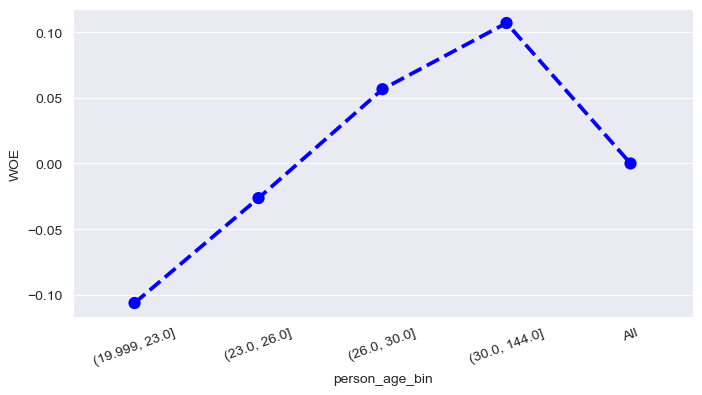

In [210]:
# Plot the WOE of  person_age
plot_WOE(crosstab_age)

- Younger debtors tend to be generally of a higher risk than older debtors.
- This is logical since their income not really stable yet.
- Older debtors tend to have lower risk.

### 9.3.2 Person Employment Length

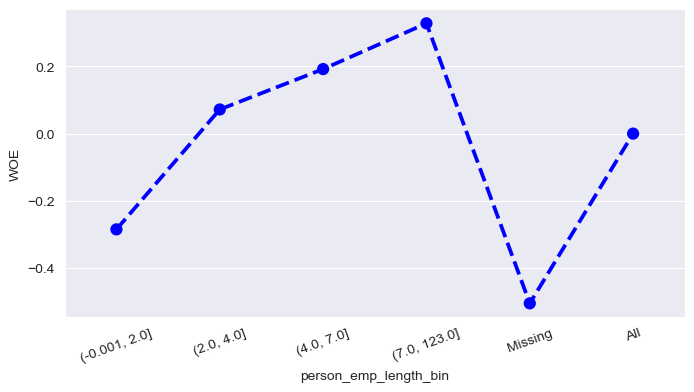

In [211]:
# Plot the WoE of person_emp_length
plot_WOE(crosstab_emp_length)

### 9.3.3 Person Income

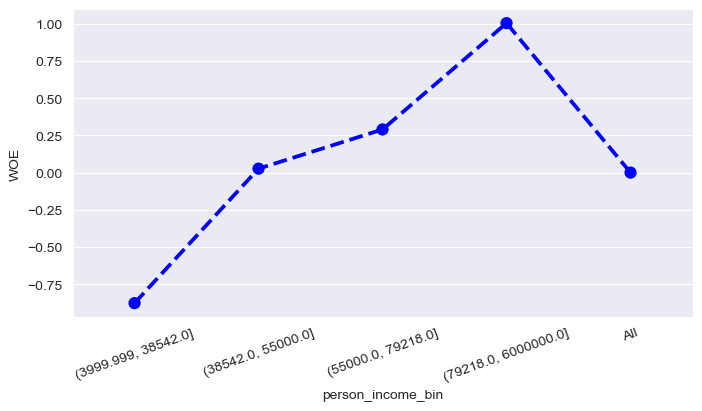

In [218]:
# Plot the WoE of person_income
plot_WOE(crosstab_person_income)

### 9.3.4 Loan Amount

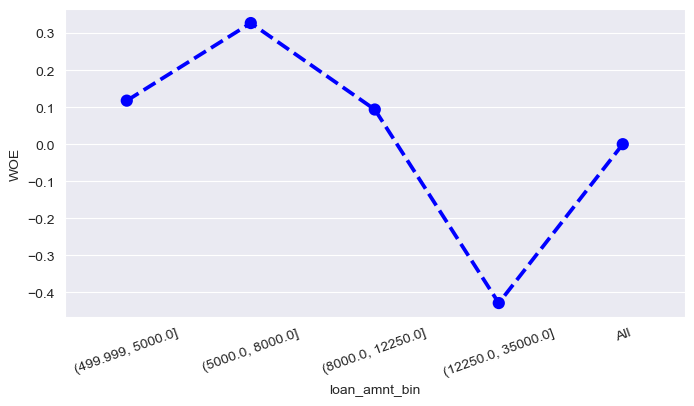

In [219]:
# Plot the WoE of person_loan_amnt
plot_WOE(crosstab_loan_amnt)

### 9.3.5 Loan Percentage of Income

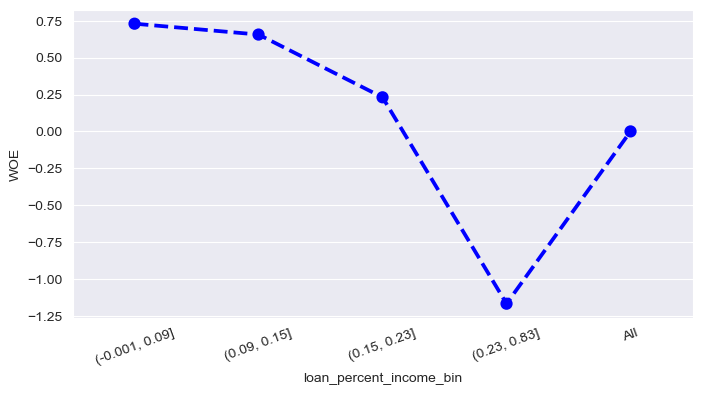

In [220]:
# Plot the WoE of percent_income
plot_WOE(crosstab_percent_income)

### 9.3.6 Person Credit History Length

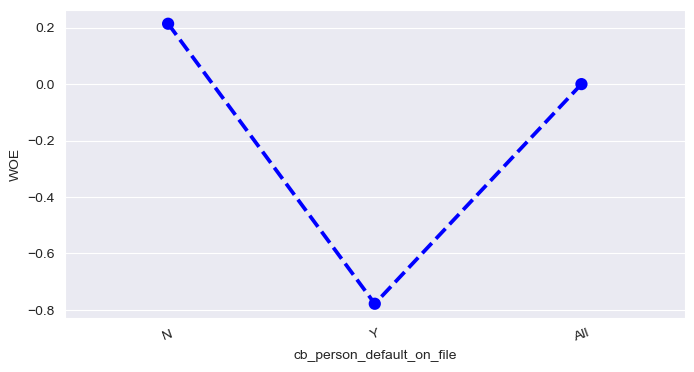

In [221]:
# Plot the WoE of cb_person_default_on_file
plot_WOE(crosstab_cb_person_default_on_file)

### 9.3.7 Loan Interest Rate

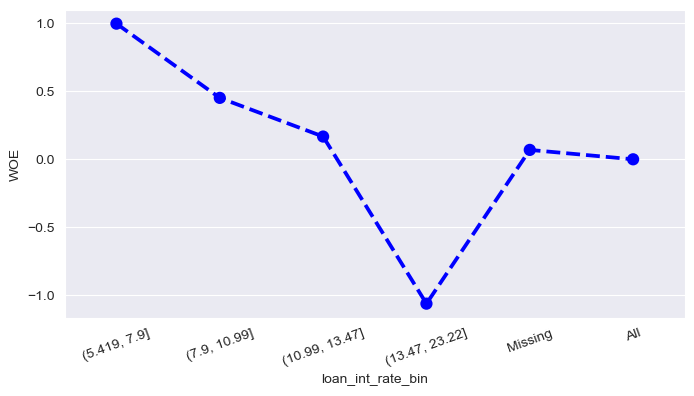

In [222]:
# Plot the WoE of loan_int_rate
plot_WOE(crosstab_int_rate)

### 9.3.8 Person Home Ownership 

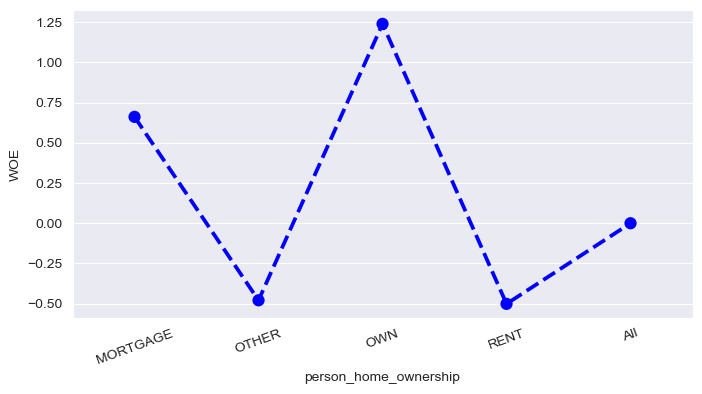

In [223]:
# Plot the WoE of person_home_ownership
plot_WOE(crosstab_person_home_ownership)

### 9.3.9 Loan Intent

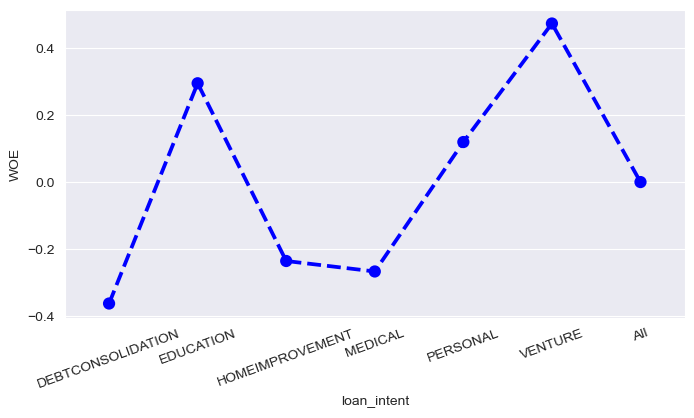

In [224]:
# Plot the WoE of loan_intent
plot_WOE(crosstab_loan_intent)

### 9.3.10 Loan Grade

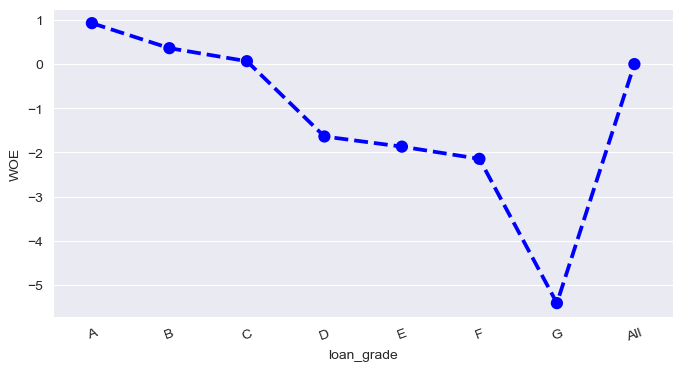

In [225]:
# Plot the WoE of loan_grade
plot_WOE(crosstab_loan_grade)

### 9.3.11 Person Default on File

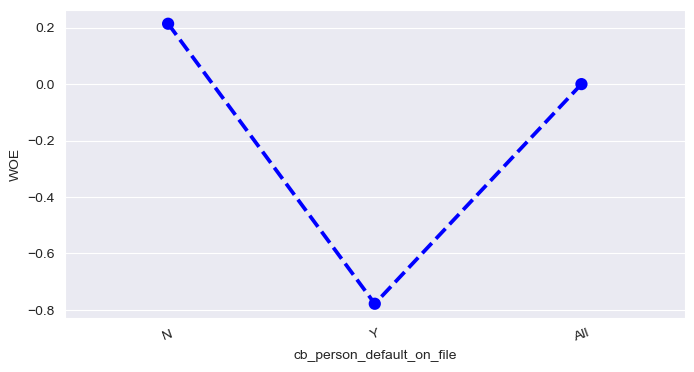

In [212]:
# Plot the WoE of cb_person_default_on_file
plot_WOE(crosstab_cb_person_default_on_file)

### 9.4 Test of Independence

- For now, assume that the WOE for each attribute in all characteristics supports the logical trend and operational/business sense.
- Then, we can check the strength of each characteristic as a predictor of credit performance by its Information Value (IV).

In [226]:
# Display the IV Table
IV_table

,Characteristic,Information Value
0,person_age,0.006609
1,person_emp_length,0.066489
2,person_income,0.433601
3,loan_amnt,0.079341
5,cb_person_cred_hist_length,0.005991
6,loan_int_rate,0.539998
7,person_home_ownership,0.375582
8,loan_intent,0.095977
9,loan_grade,0.882659
10,cb_person_default_on_file,0.164265


The rule of thumb regarding IV:
- Less than 0.02 : generally unpredictive
- 0.02 to 0.1 : weak
- 0.1 to 0.3 : medium
- 0.3+ : strong

In [228]:
# Define the predictive power of each characteristic
strength = []

for iv in IV_table['Information Value']:
  if iv < 0.02:
    strength.append('Unpredictive')
  elif iv >= 0.02 and iv < 0.1:
    strength.append('Weak')
  elif iv >= 0.1 and iv < 0.3:
    strength.append('Medium')
  else:
    strength.append('Strong')

IV_table = IV_table.assign(Strength = strength)
IV_table

,Characteristic,Information Value,Strength
0,person_age,0.006609,Unpredictive
1,person_emp_length,0.066489,Weak
2,person_income,0.433601,Strong
3,loan_amnt,0.079341,Weak
5,cb_person_cred_hist_length,0.005991,Unpredictive
6,loan_int_rate,0.539998,Strong
7,person_home_ownership,0.375582,Strong
8,loan_intent,0.095977,Weak
9,loan_grade,0.882659,Strong
10,cb_person_default_on_file,0.164265,Medium


- The predictive power of characteristics varies from unpredictive, weak to strong.
- Next, we check the dependency between each characteristic and the response `loan_status` before modeling.

In [229]:
# Independence test for person_age_bin
independence_test(data = data_train_binned,
                  predictor_label = 'person_age_bin',
                  alpha = 0.05)

Loan Status and person_age_bin is not independent with P-val=0.000.


In [232]:
# Independence test for person_emp_length_bin
independence_test(data = data_train_binned,
                  predictor_label = 'person_emp_length_bin',
                  alpha = 0.05)

Loan Status and person_emp_length_bin is not independent with P-val=0.000.


In [233]:
# Independence test for person_emp_length_bin
independence_test(data = data_train_binned,
                  predictor_label = 'person_income_bin',
                  alpha = 0.05)

Loan Status and person_income_bin is not independent with P-val=0.000.


In [234]:
# Independence test for person_emp_length_bin
independence_test(data = data_train_binned,
                  predictor_label = 'loan_amnt_bin',
                  alpha = 0.05)

Loan Status and loan_amnt_bin is not independent with P-val=0.000.


In [235]:
# Independence test for person_emp_length_bin
independence_test(data = data_train_binned,
                  predictor_label = 'loan_percent_income_bin',
                  alpha = 0.05)

Loan Status and loan_percent_income_bin is not independent with P-val=0.000.


In [236]:
# Independence test for person_emp_length_bin
independence_test(data = data_train_binned,
                  predictor_label = 'cb_person_cred_hist_length_bin',
                  alpha = 0.05)

Loan Status and cb_person_cred_hist_length_bin is not independent with P-val=0.000.


In [237]:
# Independence test for person_emp_length_bin
independence_test(data = data_train_binned,
                  predictor_label = 'loan_int_rate_bin',
                  alpha = 0.05)

Loan Status and loan_int_rate_bin is not independent with P-val=0.000.


## 9.5 Design Scorecards

- To design the scorecards, we will use a logistic regression model.
- We will perform the logistic regression not against the original input, but rather against the WOE of each grouping created in the previous step.

Therefore, we will transform the training set into the WOE value of each attribute.

In [243]:
IV_table

,Characteristic,Information Value,Strength
0,person_age,0.006609,Unpredictive
1,person_emp_length,0.066489,Weak
2,person_income,0.433601,Strong
3,loan_amnt,0.079341,Weak
5,cb_person_cred_hist_length,0.005991,Unpredictive
6,loan_int_rate,0.539998,Strong
7,person_home_ownership,0.375582,Strong
8,loan_intent,0.095977,Weak
9,loan_grade,0.882659,Strong
10,cb_person_default_on_file,0.164265,Medium


- Percentage Income

In [245]:
crosstab_percent_income['WOE']

loan_percent_income_bin
(-0.001, 0.09]    0.730590
(0.09, 0.15]      0.656925
(0.15, 0.23]      0.231307
(0.23, 0.83]     -1.168475
All               0.000000
Name: WOE, dtype: float64

In [249]:
# Define the each attribute
income_1 = (data_train_binned['person_income'] >= -0.001) & (data_train_binned['person_income'] < 0.09)
income_2 = (data_train_binned['person_income'] >= 0.09) & (data_train_binned['person_income'] < 0.15)
income_3 = (data_train_binned['person_income'] >= 0.15) & (data_train_binned['person_income'] < 0.23)

# Replace the input with WOE
data_train_binned['person_income_WOE'] = np.where(income_1, 0.730590,
                               np.where(income_2, 0.656925,
                               np.where(income_3, 0.231307, -1.168475)))

data_train_binned.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,cb_person_cred_hist_length,person_age_bin,person_emp_length_bin,person_income_bin,loan_amnt_bin,loan_percent_income_bin,cb_person_cred_hist_length_bin,loan_int_rate_bin,person_age_WOE,person_income_WOE
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,3,"(19.999, 23.0]","(7.0, 123.0]","(55000.0, 79218.0]","(12250.0, 35000.0]","(0.23, 0.83]","(1.999, 3.0]","(13.47, 23.22]",-1.168475,-1.168475
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,2,"(19.999, 23.0]","(4.0, 7.0]","(3999.999, 38542.0]","(499.999, 5000.0]","(0.09, 0.15]","(1.999, 3.0]","(10.99, 13.47]",-1.168475,-1.168475
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,3,"(23.0, 26.0]","(-0.001, 2.0]","(3999.999, 38542.0]","(5000.0, 8000.0]","(0.23, 0.83]","(1.999, 3.0]","(10.99, 13.47]",-1.168475,-1.168475
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,2,"(19.999, 23.0]","(2.0, 4.0]","(55000.0, 79218.0]","(12250.0, 35000.0]","(0.23, 0.83]","(1.999, 3.0]","(13.47, 23.22]",-1.168475,-1.168475
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,4,"(23.0, 26.0]","(7.0, 123.0]","(38542.0, 55000.0]","(12250.0, 35000.0]","(0.23, 0.83]","(3.0, 4.0]","(13.47, 23.22]",-1.168475,-1.168475


- Loan Interest rate 

In [248]:
crosstab_int_rate['WOE']

loan_int_rate_bin
(5.419, 7.9]      0.997268
(7.9, 10.99]      0.451560
(10.99, 13.47]    0.167227
(13.47, 23.22]   -1.061350
Missing           0.069118
All               0.000000
Name: WOE, dtype: float64

In [250]:
# Define the each attribute
rate_1 = (data_train_binned['loan_int_rate'] >= 5.419) & (data_train_binned['loan_int_rate'] < 7.9)
rate_2 = (data_train_binned['loan_int_rate'] >= 7.9) & (data_train_binned['loan_int_rate'] < 10.99)
rate_3 = (data_train_binned['loan_int_rate'] >= 10.99) & (data_train_binned['loan_int_rate'] < 13.47)
rate_4 = (data_train_binned['loan_int_rate'] >= 13.47) & (data_train_binned['loan_int_rate'] < 23.22)

# Replace the input with WOE
data_train_binned['loan_int_rate_WOE'] = np.where(rate_1, 0.997268,
                            np.where(rate_2, 0.451560,
                            np.where(rate_3, 0.167227,
                            np.where(rate_4, 1.061350, 0.069118))))

data_train_binned.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,person_age_bin,person_emp_length_bin,person_income_bin,loan_amnt_bin,loan_percent_income_bin,cb_person_cred_hist_length_bin,loan_int_rate_bin,person_age_WOE,person_income_WOE,loan_int_rate_WOE
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,"(19.999, 23.0]","(7.0, 123.0]","(55000.0, 79218.0]","(12250.0, 35000.0]","(0.23, 0.83]","(1.999, 3.0]","(13.47, 23.22]",-1.168475,-1.168475,1.061350
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,"(19.999, 23.0]","(4.0, 7.0]","(3999.999, 38542.0]","(499.999, 5000.0]","(0.09, 0.15]","(1.999, 3.0]","(10.99, 13.47]",-1.168475,-1.168475,0.167227
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,"(23.0, 26.0]","(-0.001, 2.0]","(3999.999, 38542.0]","(5000.0, 8000.0]","(0.23, 0.83]","(1.999, 3.0]","(10.99, 13.47]",-1.168475,-1.168475,0.167227
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,"(19.999, 23.0]","(2.0, 4.0]","(55000.0, 79218.0]","(12250.0, 35000.0]","(0.23, 0.83]","(1.999, 3.0]","(13.47, 23.22]",-1.168475,-1.168475,1.061350
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,"(23.0, 26.0]","(7.0, 123.0]","(38542.0, 55000.0]","(12250.0, 35000.0]","(0.23, 0.83]","(3.0, 4.0]","(13.47, 23.22]",-1.168475,-1.168475,1.061350


In [251]:
crosstab_loan_grade['WOE']

loan_grade
A      0.928370
B      0.361394
C      0.066626
D     -1.639805
E     -1.869847
F     -2.146445
G     -5.416461
All    0.000000
Name: WOE, dtype: float64

In [254]:
# Create label WOE for each attribute
label_loan_grade = {'A' : 0.928370,
                    'B' : 0.361394,
                    'C' : 0.066626,
                    'D' : -1.639805,
                    'E' : -1.869847,
                    'F' : -2.146445,
                    'G' : -5.416461}

# Transform each attribute into WOE
data_train_binned['loan_grade_WOE'] = data_train_binned['loan_grade'].map(label_loan_grade)
data_train_binned.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,person_emp_length_bin,person_income_bin,loan_amnt_bin,loan_percent_income_bin,cb_person_cred_hist_length_bin,loan_int_rate_bin,person_age_WOE,person_income_WOE,loan_int_rate_WOE,loan_grade_WOE
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,"(7.0, 123.0]","(55000.0, 79218.0]","(12250.0, 35000.0]","(0.23, 0.83]","(1.999, 3.0]","(13.47, 23.22]",-1.168475,-1.168475,1.061350,-1.639805
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,"(4.0, 7.0]","(3999.999, 38542.0]","(499.999, 5000.0]","(0.09, 0.15]","(1.999, 3.0]","(10.99, 13.47]",-1.168475,-1.168475,0.167227,0.361394
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,"(-0.001, 2.0]","(3999.999, 38542.0]","(5000.0, 8000.0]","(0.23, 0.83]","(1.999, 3.0]","(10.99, 13.47]",-1.168475,-1.168475,0.167227,0.066626
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,"(2.0, 4.0]","(55000.0, 79218.0]","(12250.0, 35000.0]","(0.23, 0.83]","(1.999, 3.0]","(13.47, 23.22]",-1.168475,-1.168475,1.061350,0.066626
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,"(7.0, 123.0]","(38542.0, 55000.0]","(12250.0, 35000.0]","(0.23, 0.83]","(3.0, 4.0]","(13.47, 23.22]",-1.168475,-1.168475,1.061350,0.066626


In [255]:
# Define X_train and y_train
X_train = data_train_binned[['person_income_WOE',
                      'loan_int_rate_WOE',
                      'loan_grade_WOE']]

y_train = data_train_binned['loan_status']

In [260]:
from sklearn.model_selection import cross_validate

def get_scores(predictor_set):
    """
    Function to fit a model on train set and calculate its AIC from test set

    Parameters
    ----------
    predictor_set : tuple object
      The predictor set that will be included in model

    Returns
    -------
    predictor_set : tuple object
      The predictor set from parameters

    AIC : float
      The AIC score from test set
    """
    # Define the estimator
    model = LogisticRegression(penalty = 'none',
                               class_weight = 'balanced')

    # Perform 5-fold CV to get CV scores (average log likelihood)
    scores = cross_validate(estimator = model,
                            X = X_train[list(predictor_set)],
                            y = y_train,
                            scoring = 'neg_log_loss',
                            cv = 5)

    # Calculate log likelihood from test set
    log_likelihood = np.mean(scores['test_score']*len(X_train[list(predictor_set)]))

    # Calculate AIC from test set
    AIC = -2*(log_likelihood - (len(X_train[list(predictor_set)].columns)+1))
    AIC = round(AIC, 2)

    return {'Predictors':list(predictor_set), 'AIC':AIC}

In [261]:
# Check the function
get_scores(X_train.columns)

c:\Users\daniel.satria\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\daniel.satria\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\daniel.satria\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\daniel.satria\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.wa

{'Predictors': ['person_income_WOE', 'loan_int_rate_WOE', 'loan_grade_WOE'],
 'AIC': 38079.32}

In [262]:
def best_subset(k):
    """
    Function to choose the best model of each k predictors included

    Parameters
    ----------
    k : int, in range number of all predictors (p)
      The number of predictors included in model

    Returns
    -------
    models : {array-like} of shape (combination(p, k), k)
      The list of all possible models and its AIC score

    best_models : {array-like} of shape (2, ) contains predictor_set and AIC
      The best model with the smallest AIC in list of possible models

    """
    # Create a list of result from function get_scores(predictor_set)
    results = []

    # Fit model and calculate AIC from each combination of predictors
    for combination in itertools.combinations(X_train.columns, k):
        results.append(get_scores(combination))

    # Tabulate list of results in dataframe
    models = pd.DataFrame(results)

    # Choose the best model with the smallest AIC
    best_model = models.loc[models['AIC'].argmin()]

    # Return the list of possible models and the best model
    return best_model

In [264]:
import itertools

# Create table for best model from each combination of predictors
best_subset_models = pd.DataFrame(columns = ['Predictors', 'AIC'])

# Get the best model k for k=1,...,p
for k in range(1, X_train.shape[1]+1):
    best_subset_models.loc[k] = best_subset(k)

c:\Users\daniel.satria\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\daniel.satria\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\daniel.satria\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\daniel.satria\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.wa

c:\Users\daniel.satria\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\daniel.satria\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\daniel.satria\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\daniel.satria\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.wa

In [265]:
# Print the best models
best_subset_models

,Predictors,AIC
1,[loan_grade_WOE],38076.92
2,"[loan_int_rate_WOE, loan_grade_WOE]",38077.29
3,"[person_income_WOE, loan_int_rate_WOE, loan_gr...",38079.32


- The smallest AIC score comes from the model with all characteristics as predictors.
- To get the best model, refit the model with all characteristics included as predictors.

In [267]:
# Define the model
model = LogisticRegression(penalty = 'none',
                           class_weight = 'balanced')

# Model fitting
model.fit(X = X_train,
          y = y_train)

c:\Users\daniel.satria\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(class_weight='balanced', penalty='none')

In [268]:
# Extract the parameter estimate: intercept
b0 = model.intercept_
b0

array([0.01695081])

In [269]:
# Extract the parameter estimate: slope
bj = model.coef_
bj

array([[-0.0198066 , -0.06668341, -1.00839759]])

## 9.6 Scaling

Assign score to each attribute by specifying:
- Odds of 50:1 at 200 points score, and
- 20 PDO (points to double the odds).

Thus, we can calculate the offset and factor:
- $\text{Factor}=\text{PDO}/ \ln(2)$
- $\text{Offset} = \text{Score} − {\text{Factor} ∗ \ln (\text{Odds})}$

Therefore, the score point for each attribute $i$:
$$
-\left (\text{WOE}_i \times \beta_j + \frac{\beta_0}{n}  \right )\times \text{Factor}+\frac{\text{Offset}}{n}
$$


In [275]:
# Define Factor and Offset
factor = 20/np.log(2)
offset = 200-(factor*np.log(50))

factor, offset

(28.85390081777927, 87.1228762045055)

In [276]:
# Define n = number of characteristics
n = bj.shape[1]

# Define b0
b0 = b0[0]

b0, n

(0.016950809244944232, 3)

In [278]:
crosstab_person_income

loan_status,0,1,All,p_good,p_bad,WOE,contribution
person_income_bin,,,,,,,
"(3999.999, 38542.0]",3304,2201,5505,0.185098,0.444646,-0.876394,0.227467
"(38542.0, 55000.0]",4555,1230,5785,0.255182,0.248485,0.026595,0.000178
"(55000.0, 79218.0]",4756,987,5743,0.266443,0.199394,0.289876,0.019436
"(79218.0, 6000000.0]",5235,532,5767,0.293277,0.107475,1.003863,0.186520
All,17850,4950,22800,1.000000,1.000000,0.000000,0.000000


In [279]:
# Define beta_j for characteristic person_income
b_income = bj[0][0]

b_income

-0.019806596832479102

In [281]:
# Calculate the score point for each attribute
crosstab_person_income['points'] = -((crosstab_person_income['WOE']*b_income) + (b0/n)) \
                         * factor + (offset/n)

crosstab_person_income

loan_status,0,1,All,p_good,p_bad,WOE,contribution,points
person_income_bin,,,,,,,,
"(3999.999, 38542.0]",3304,2201,5505,0.185098,0.444646,-0.876394,0.227467,28.377069
"(38542.0, 55000.0]",4555,1230,5785,0.255182,0.248485,0.026595,0.000178,28.893126
"(55000.0, 79218.0]",4756,987,5743,0.266443,0.199394,0.289876,0.019436,29.043590
"(79218.0, 6000000.0]",5235,532,5767,0.293277,0.107475,1.003863,0.186520,29.451632
All,17850,4950,22800,1.000000,1.000000,0.000000,0.000000,28.877926


In [282]:
crosstab_int_rate

loan_status,0,1,All,p_good,p_bad,WOE,contribution
loan_int_rate_bin,,,,,,,
"(5.419, 7.9]",6983,721,7704,0.275714,0.101707,0.997268,0.173531
"(7.9, 10.99]",6044,1077,7121,0.238639,0.151926,0.451560,0.039156
"(10.99, 13.47]",5794,1372,7166,0.228768,0.193539,0.167227,0.005891
"(13.47, 23.22]",4052,3278,7330,0.159987,0.462407,-1.061350,0.320972
Missing,2454,641,3095,0.096893,0.090422,0.069118,0.000447
All,25327,7089,32416,1.000000,1.000000,0.000000,0.000000


In [284]:
# Define beta_j for characteristic int_rate
b_int = bj[0][1]

b_int

-0.06668340875377311

In [287]:
# Calculate the score point for each attribute
crosstab_int_rate['points'] = -((crosstab_int_rate['WOE']*b_int) + (b0/n)) \
                                * factor + (offset/n)

crosstab_int_rate

loan_status,0,1,All,p_good,p_bad,WOE,contribution,points
loan_int_rate_bin,,,,,,,,
"(5.419, 7.9]",6983,721,7704,0.275714,0.101707,0.997268,0.173531,30.796746
"(7.9, 10.99]",6044,1077,7121,0.238639,0.151926,0.451560,0.039156,29.746762
"(10.99, 13.47]",5794,1372,7166,0.228768,0.193539,0.167227,0.005891,29.199683
"(13.47, 23.22]",4052,3278,7330,0.159987,0.462407,-1.061350,0.320972,26.835809
Missing,2454,641,3095,0.096893,0.090422,0.069118,0.000447,29.010916
All,25327,7089,32416,1.000000,1.000000,0.000000,0.000000,28.877926


In [288]:
crosstab_loan_grade

loan_status,0,1,All,p_good,p_bad,WOE,contribution
loan_grade,,,,,,,
A,9637,1066,10703,0.380503,0.150374,0.928370,0.213645
B,8692,1695,10387,0.343191,0.239103,0.361394,0.037617
C,5102,1336,6438,0.201445,0.188461,0.066626,0.000865
D,1482,2138,3620,0.058515,0.301594,-1.639805,0.398603
E,342,621,963,0.013503,0.087601,-1.869847,0.138550
F,71,170,241,0.002803,0.023981,-2.146445,0.045456
G,1,63,64,0.000039,0.008887,-5.416461,0.047922
All,25327,7089,32416,1.000000,1.000000,0.000000,0.000000


In [289]:
# Define beta_j for characteristic loan_grade
b_int = bj[0][2]

b_int

-1.0083975889871175

In [290]:
# Calculate the score point for each attribute
crosstab_loan_grade['points'] = -((crosstab_loan_grade['WOE']*b_int) + (b0/n)) \
                                * factor + (offset/n)

crosstab_loan_grade

loan_status,0,1,All,p_good,p_bad,WOE,contribution,points
loan_grade,,,,,,,,
A,9637,1066,10703,0.380503,0.150374,0.928370,0.213645,55.889963
B,8692,1695,10387,0.343191,0.239103,0.361394,0.037617,39.393108
C,5102,1336,6438,0.201445,0.188461,0.066626,0.000865,30.816485
D,1482,2138,3620,0.058515,0.301594,-1.639805,0.398603,-18.834175
E,342,621,963,0.013503,0.087601,-1.869847,0.138550,-25.527526
F,71,170,241,0.002803,0.023981,-2.146445,0.045456,-33.575484
G,1,63,64,0.000039,0.008887,-5.416461,0.047922,-128.720541
All,25327,7089,32416,1.000000,1.000000,0.000000,0.000000,28.877926


In [291]:
data_train_binned.sample(random_state=1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,person_emp_length_bin,person_income_bin,loan_amnt_bin,loan_percent_income_bin,cb_person_cred_hist_length_bin,loan_int_rate_bin,person_age_WOE,person_income_WOE,loan_int_rate_WOE,loan_grade_WOE
6475,25,50000,OWN,2.0,HOMEIMPROVEMENT,B,20000,11.71,0,0.4,...,"(-0.001, 2.0]","(38542.0, 55000.0]","(12250.0, 35000.0]","(0.23, 0.83]","(3.0, 4.0]","(10.99, 13.47]",-1.168475,-1.168475,0.167227,0.361394


In [293]:
person_income = 28.893126
loan_grade = 39.393108
loan_int_rate = 29.199683

total_score = person_income + loan_grade + loan_int_rate
total_score

97.485917

- Suppose the threshold is 100, the record will be rejected.